In [1]:
# make the imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import io, signal

dict_keys(['__header__', '__version__', '__globals__', 'ecog_anes', 'ecog_eyesclosed', 'ecog_eyesopen', 'elec_num', 'fs', 'labels'])
1000
(3, 300000)
['cingulate' 'occipital' 'temporal']
[52 70 91]


/Users/daniellew/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/daniellew/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


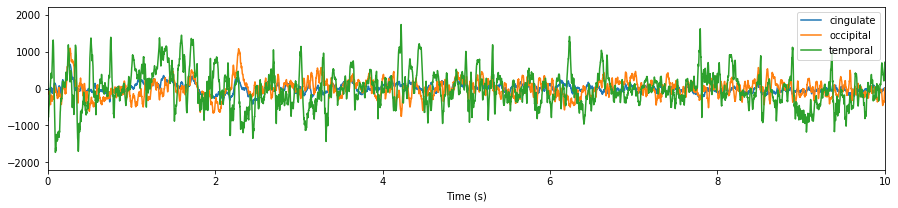

In [2]:
monkey_ecog_data = io.loadmat('ECoG_monkey/ECoG_monkey.mat', squeeze_me = True)
print(monkey_ecog_data.keys())
print(monkey_ecog_data['fs'])
print(monkey_ecog_data['ecog_eyesopen'].shape)
print(monkey_ecog_data['labels'])
print(monkey_ecog_data['elec_num'])

plt.figure(figsize=(15,3))
plt.plot(np.arange(0,monkey_ecog_data['ecog_eyesopen'].shape[1]/monkey_ecog_data['fs'],1/monkey_ecog_data['fs']), 
         monkey_ecog_data['ecog_eyesopen'].T)
plt.xlim([0,10])
plt.xlabel('Time (s)')
plt.legend(monkey_ecog_data['labels'])

In [3]:
fs = monkey_ecog_data['fs']
print('Sampling rate = %iHz'%fs)
print(monkey_ecog_data['elec_num'])
eyesopenLFP = monkey_ecog_data['ecog_eyesopen'][1,:]/1000
eyesclosedLFP = monkey_ecog_data['ecog_eyesclosed'][1,:]/1000
sleepingMonkeyLFP = monkey_ecog_data['ecog_anes'][1,:]/1000

t_Open = np.arange(0, len(eyesopenLFP)/fs, 1/fs)
t_Closed = np.arange(0, len(eyesclosedLFP)/fs, 1/fs)
t_Sleep = np.arange(0, len(sleepingMonkeyLFP)/fs, 1/fs)


FIR_theta = signal.firwin(751, fs=fs, cutoff = [4,10], pass_zero = False) 
FIR_gamma = signal.firwin(751, fs=fs, cutoff = [30,50], pass_zero = False) 
FIR_alpha = signal.firwin(751, fs=fs, cutoff = [6,12], pass_zero = False) 
FIR_beta = signal.firwin(751, fs=fs, cutoff = [12.5,30], pass_zero = False)
FIR_delta = signal.firwin(751, fs=fs, cutoff = [0.5,4], pass_zero = False)


Sampling rate = 1000Hz
[52 70 91]


In [4]:
theta_oscOpen = np.convolve(eyesopenLFP, FIR_theta, mode= 'same')
theta_oscClosed = np.convolve(eyesclosedLFP, FIR_theta, mode= 'same')
theta_oscSleep = np.convolve(sleepingMonkeyLFP, FIR_theta, mode= 'same')

gamma_oscOpen = np.convolve(eyesopenLFP, FIR_gamma, mode= 'same')
gamma_oscClosed = np.convolve(eyesclosedLFP, FIR_gamma, mode= 'same')
gamma_oscSleep = np.convolve(sleepingMonkeyLFP, FIR_gamma, mode= 'same')

beta_oscOpen = np.convolve(eyesopenLFP, FIR_beta, mode= 'same')
beta_oscClosed = np.convolve(eyesclosedLFP, FIR_beta, mode= 'same')
beta_oscSleep = np.convolve(sleepingMonkeyLFP, FIR_beta, mode= 'same')

alpha_oscOpen = np.convolve(eyesopenLFP, FIR_alpha, mode= 'same')
alpha_oscClosed = np.convolve(eyesclosedLFP, FIR_alpha, mode= 'same')
alpha_oscSleep = np.convolve(sleepingMonkeyLFP, FIR_alpha, mode= 'same')

delta_oscOpen = np.convolve(eyesopenLFP, FIR_delta, mode= 'same')
delta_oscClosed = np.convolve(eyesclosedLFP, FIR_delta, mode= 'same')
delta_oscSleep = np.convolve(sleepingMonkeyLFP, FIR_delta, mode= 'same')

In [5]:
x_a_thetaOpen = signal.hilbert(theta_oscOpen)
x_a_thetaClosed = signal.hilbert(theta_oscClosed)
x_a_thetaSleep = signal.hilbert(theta_oscSleep)

x_a_gammaOpen = signal.hilbert(gamma_oscOpen)
x_a_gammaClosed = signal.hilbert(gamma_oscClosed)
x_a_gammaSleep = signal.hilbert(gamma_oscSleep)

x_a_betaOpen = signal.hilbert(beta_oscOpen)
x_a_betaClosed = signal.hilbert(beta_oscClosed)
x_a_betaSleep = signal.hilbert(beta_oscSleep)

x_a_alphaOpen = signal.hilbert(alpha_oscOpen)
x_a_alphaClosed = signal.hilbert(alpha_oscClosed)
x_a_alphaSleep = signal.hilbert(alpha_oscSleep)

x_a_deltaOpen = signal.hilbert(delta_oscOpen)
x_a_deltaClosed = signal.hilbert(delta_oscClosed)
x_a_deltaSleep = signal.hilbert(delta_oscSleep)


In [6]:

def compute_power_phase(x_a):
    power = np.abs(x_a)**2
    phase = np.angle(x_a)
    return power, phase


In [7]:
theta_powerOpen, theta_phaseOpen = compute_power_phase(x_a_thetaOpen)
theta_powerClosed, theta_phaseClosed = compute_power_phase(x_a_thetaClosed)
theta_powerSleep, theta_phaseSleep = compute_power_phase(x_a_thetaSleep)

gamma_powerOpen, gamma_phaseOpen = compute_power_phase(x_a_gammaOpen)
gamma_powerClosed, gamma_phaseClosed = compute_power_phase(x_a_gammaClosed)
gamma_powerSleep, gamma_phaseSleep = compute_power_phase(x_a_gammaSleep)

alpha_powerOpen, alpha_phaseOpen = compute_power_phase(x_a_alphaOpen)
alpha_powerClosed, alpha_phaseClosed = compute_power_phase(x_a_alphaClosed)
alpha_powerSleep, alpha_phaseSleep = compute_power_phase(x_a_alphaSleep)

beta_powerOpen, beta_phaseOpen = compute_power_phase(x_a_betaOpen)
beta_powerClosed, beta_phaseClosed = compute_power_phase(x_a_betaClosed)
beta_powerSleep, beta_phaseSleep = compute_power_phase(x_a_betaSleep)

delta_powerOpen, delta_phaseOpen = compute_power_phase(x_a_deltaOpen)
delta_powerClosed, delta_phaseClosed = compute_power_phase(x_a_deltaClosed)
delta_powerSleep, delta_phaseSleep = compute_power_phase(x_a_deltaSleep)

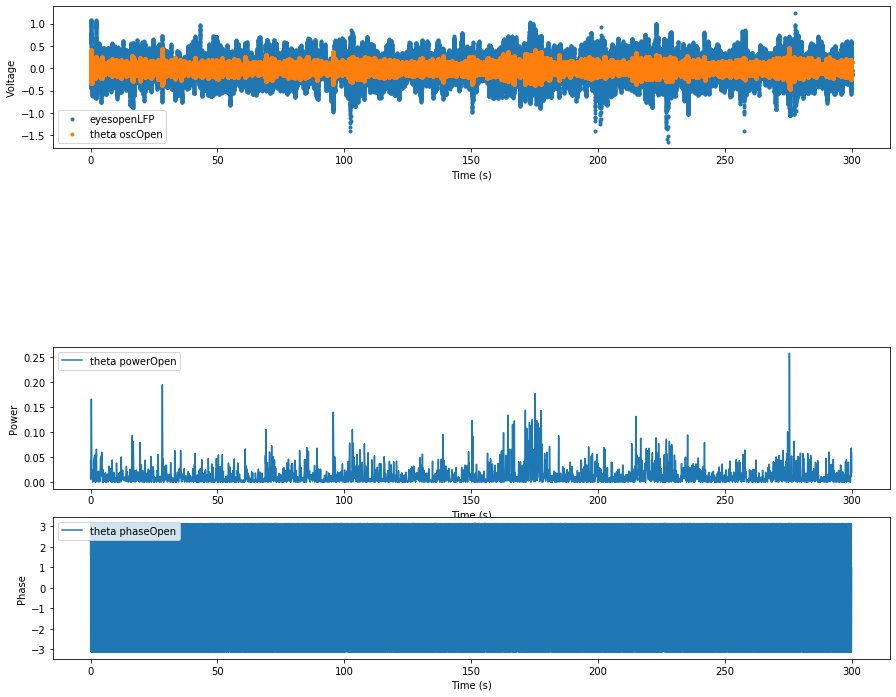

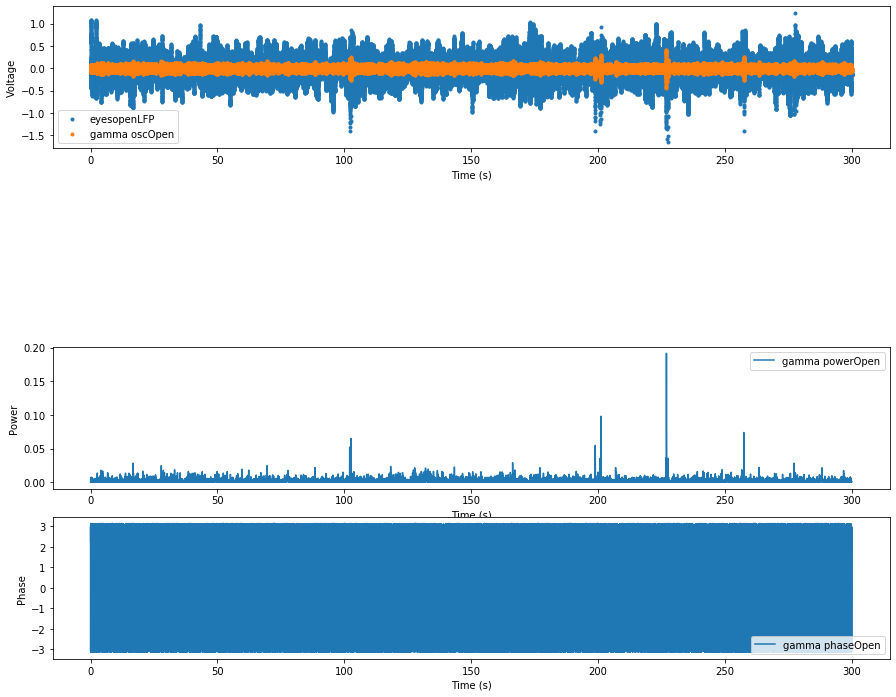

In [8]:
plt.figure(figsize=(15,12))

#plot eyes OPEN theta power and phase 

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesopenLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, theta_oscOpen, '.', label ='theta oscOpen')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, theta_powerOpen, label = 'theta powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, theta_phaseOpen, label = 'theta phaseOpen')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()

plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesopenLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, gamma_oscOpen, '.', label ='gamma oscOpen')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, gamma_powerOpen, label = 'gamma powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, gamma_phaseOpen, label = 'gamma phaseOpen')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()



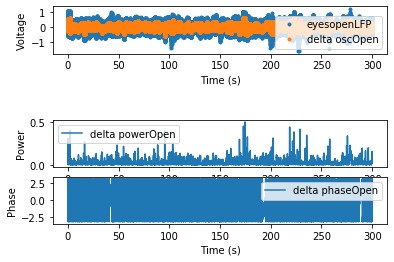

In [9]:
# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesopenLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, delta_oscOpen, '.', label ='delta oscOpen')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, delta_powerOpen, label = 'delta powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, delta_phaseOpen, label = 'delta phaseOpen')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


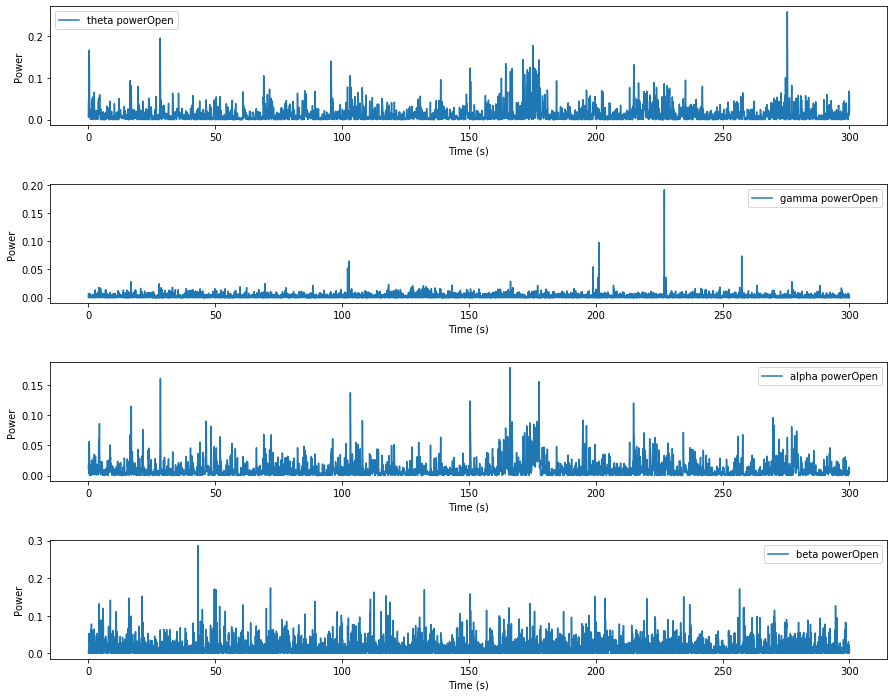

In [10]:
# Eyes open instantaneous power
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=.5)

# theta power
plt.subplot(4,1,1)
plt.plot(t_Open, theta_powerOpen, label = 'theta powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# gamma power
plt.subplot(4,1,2)
plt.plot(t_Open, gamma_powerOpen, label = 'gamma powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# alpha power
plt.subplot(4,1,3)
plt.plot(t_Open, alpha_powerOpen, label = 'alpha powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# beta power
plt.subplot(4,1,4)
plt.plot(t_Open, beta_powerOpen, label = 'beta powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

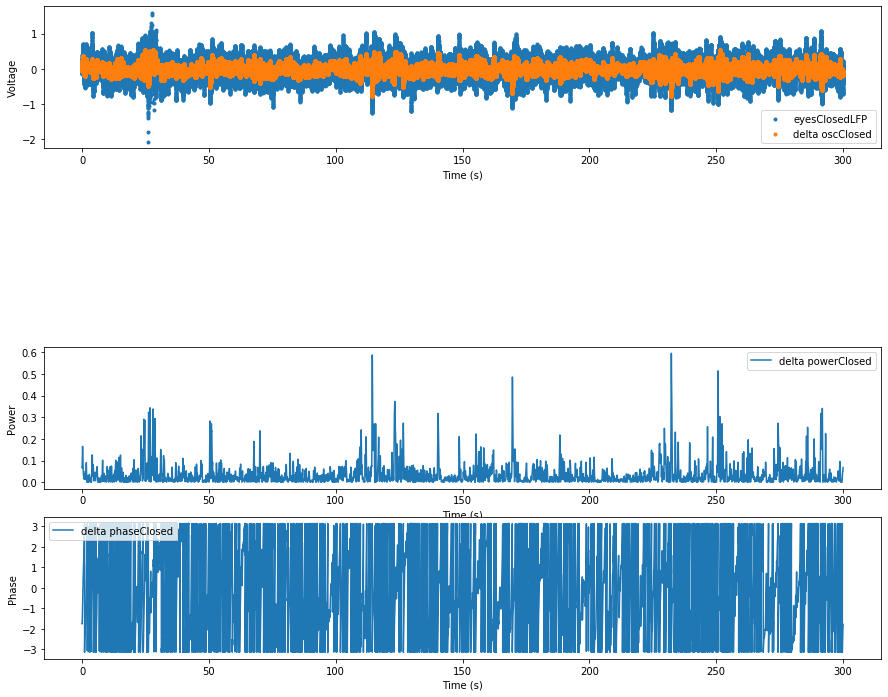

In [11]:
# plot the signal and the filtered signal
plt.figure(figsize=(15,12))
plt.subplot(4,1,1)
plt.plot(t_Open, eyesclosedLFP, '.', label = 'eyesClosedLFP')
plt.plot(t_Open, delta_oscClosed, '.', label ='delta oscClosed')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, delta_powerClosed, label = 'delta powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, delta_phaseClosed, label = 'delta phaseClosed')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()

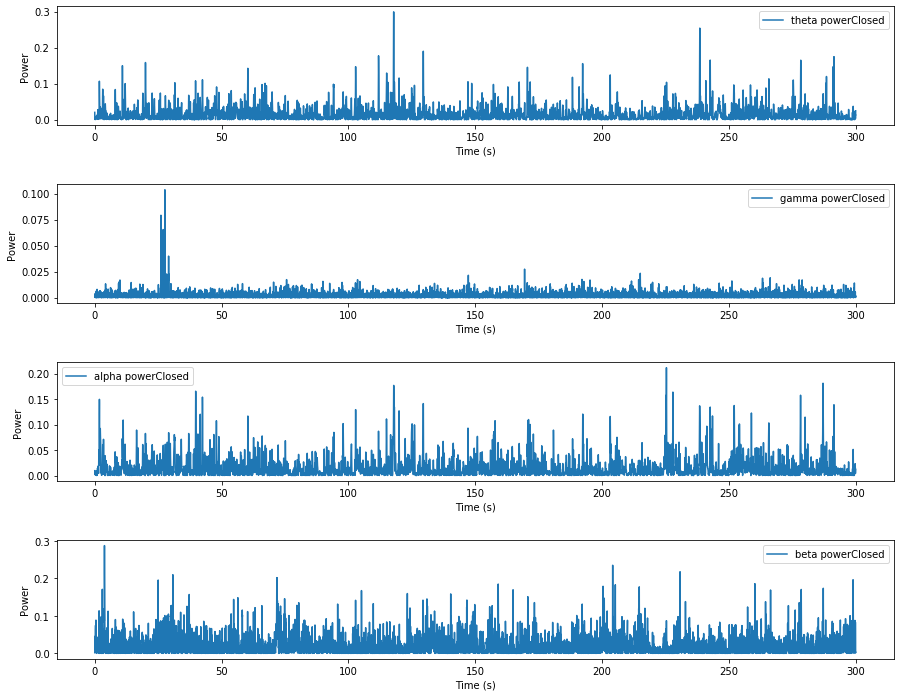

In [12]:
# Eyes closed power
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=.5)

# Theta
plt.subplot(4,1,1)
plt.plot(t_Open, theta_powerClosed, label = 'theta powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Gamma
plt.subplot(4,1,2)
plt.plot(t_Open, gamma_powerClosed, label = 'gamma powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Alpha
plt.subplot(4,1,3)
plt.plot(t_Open, alpha_powerClosed, label = 'alpha powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Beta
plt.subplot(4,1,4)
plt.plot(t_Open, beta_powerClosed, label = 'beta powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

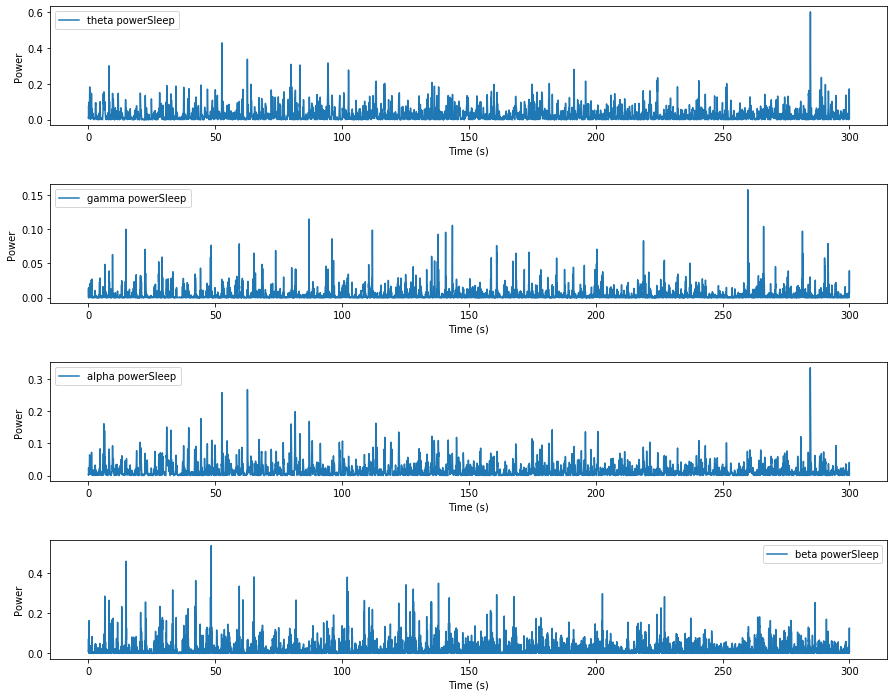

In [13]:
# Eyes sleep 
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=.5)

# Theta
plt.subplot(4,1,1)
plt.plot(t_Open, theta_powerSleep, label = 'theta powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Gamma
plt.subplot(4,1,2)
plt.plot(t_Open, gamma_powerSleep, label = 'gamma powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Alpha
plt.subplot(4,1,3)
plt.plot(t_Open, alpha_powerSleep, label = 'alpha powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Beta
plt.subplot(4,1,4)
plt.plot(t_Open, beta_powerSleep, label = 'beta powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()



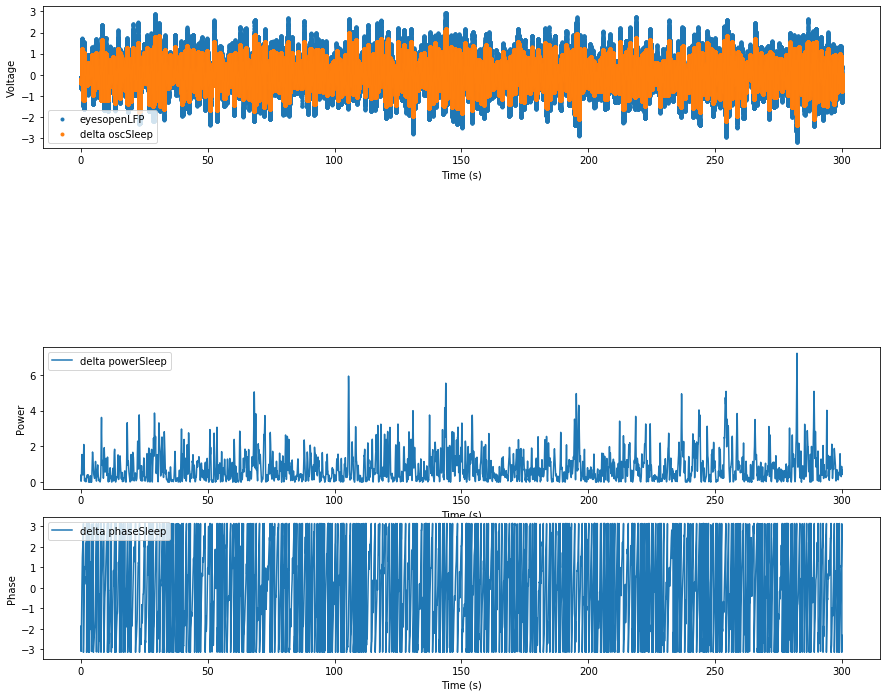

In [14]:
# plot the signal and the filtered signal
plt.figure(figsize=(15,12))
plt.subplot(4,1,1)
plt.plot(t_Open, sleepingMonkeyLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, delta_oscSleep, '.', label ='delta oscSleep')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, delta_powerSleep, label = 'delta powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, delta_phaseSleep, label = 'delta phaseSleep')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()

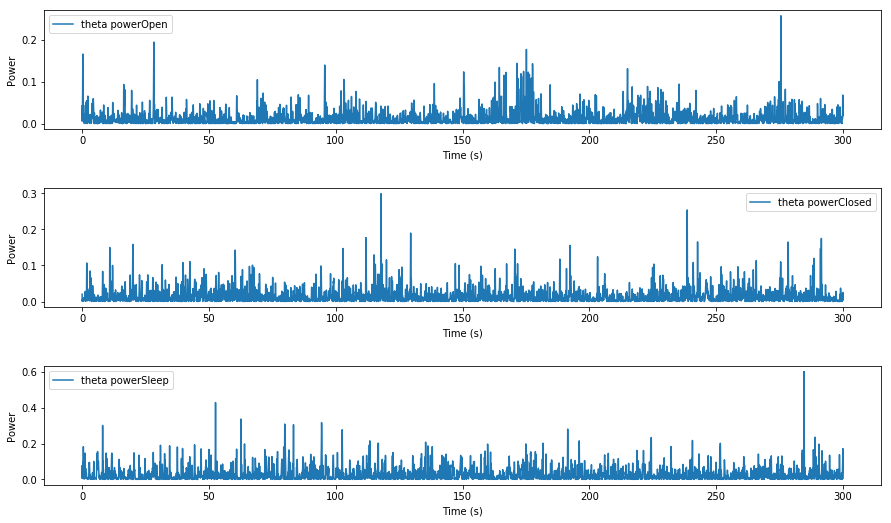

In [20]:
# Theta Powers
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=.5)

# Eyes Open
plt.subplot(4,1,1)
plt.plot(t_Open, theta_powerOpen, label = 'theta powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Eyes Closed
plt.subplot(4,1,2)
plt.plot(t_Open, theta_powerClosed, label = 'theta powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Eyes Sleep
plt.subplot(4,1,3)
plt.plot(t_Open, theta_powerSleep, label = 'theta powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

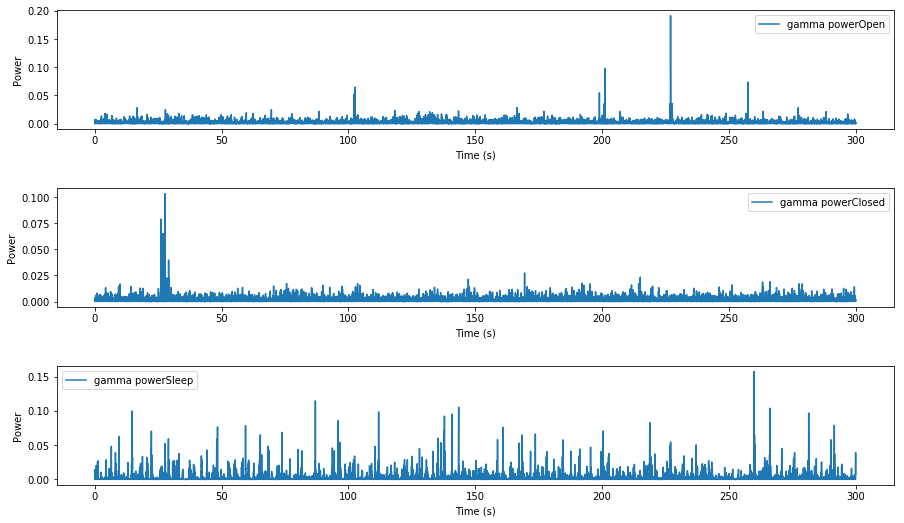

In [21]:
# Gamma Powers
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=.5)

# Eyes Open
plt.subplot(4,1,1)
plt.plot(t_Open, gamma_powerOpen, label = 'gamma powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Eyes Closed
plt.subplot(4,1,2)
plt.plot(t_Open, gamma_powerClosed, label = 'gamma powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Eyes Sleep
plt.subplot(4,1,3)
plt.plot(t_Open, gamma_powerSleep, label = 'gamma powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

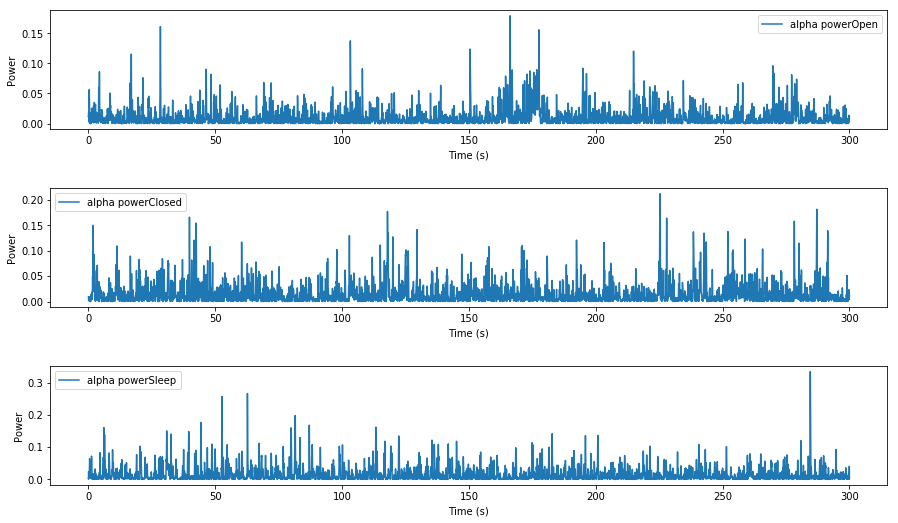

In [22]:
# Alpha Powers
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=.5)

# Eyes Open
plt.subplot(4,1,1)
plt.plot(t_Open, alpha_powerOpen, label = 'alpha powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Eyes Closed
plt.subplot(4,1,2)
plt.plot(t_Open, alpha_powerClosed, label = 'alpha powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Eyes Sleep
plt.subplot(4,1,3)
plt.plot(t_Open, alpha_powerSleep, label = 'alpha powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

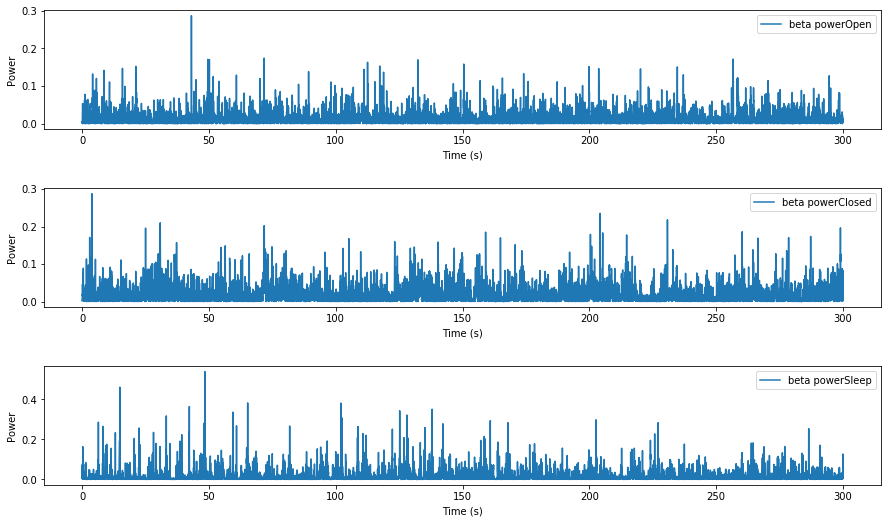

In [23]:
# Beta Powers
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=.5)

# Eyes Open
plt.subplot(4,1,1)
plt.plot(t_Open, beta_powerOpen, label = 'beta powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Eyes Closed
plt.subplot(4,1,2)
plt.plot(t_Open, beta_powerClosed, label = 'beta powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# Eyes Sleep
plt.subplot(4,1,3)
plt.plot(t_Open, beta_powerSleep, label = 'beta powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

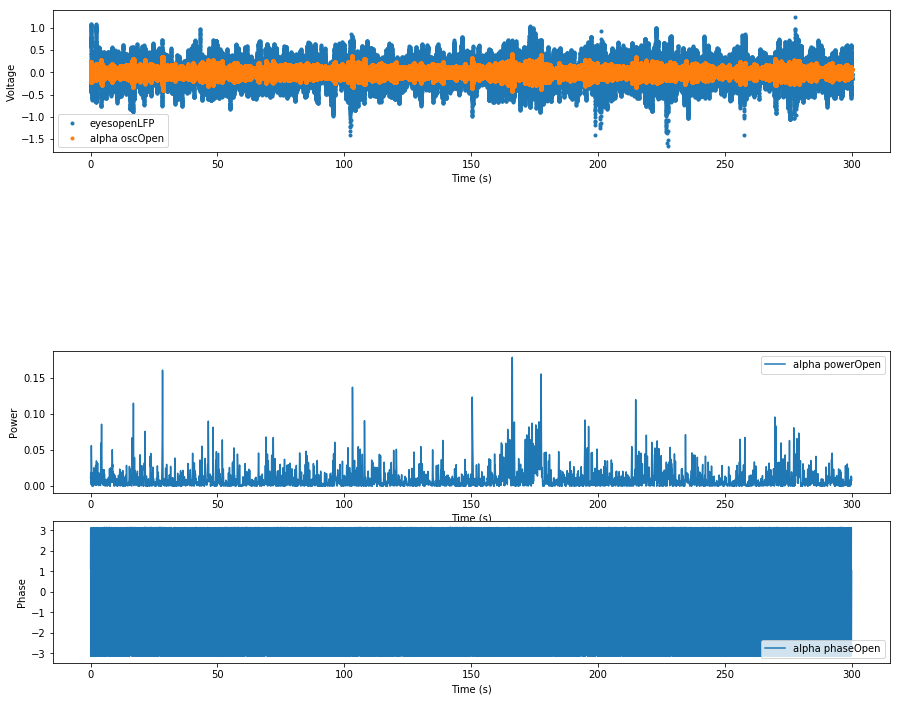

In [24]:


plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesopenLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, alpha_oscOpen, '.', label ='alpha oscOpen')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, alpha_powerOpen, label = 'alpha powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, alpha_phaseOpen, label = 'alpha phaseOpen')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


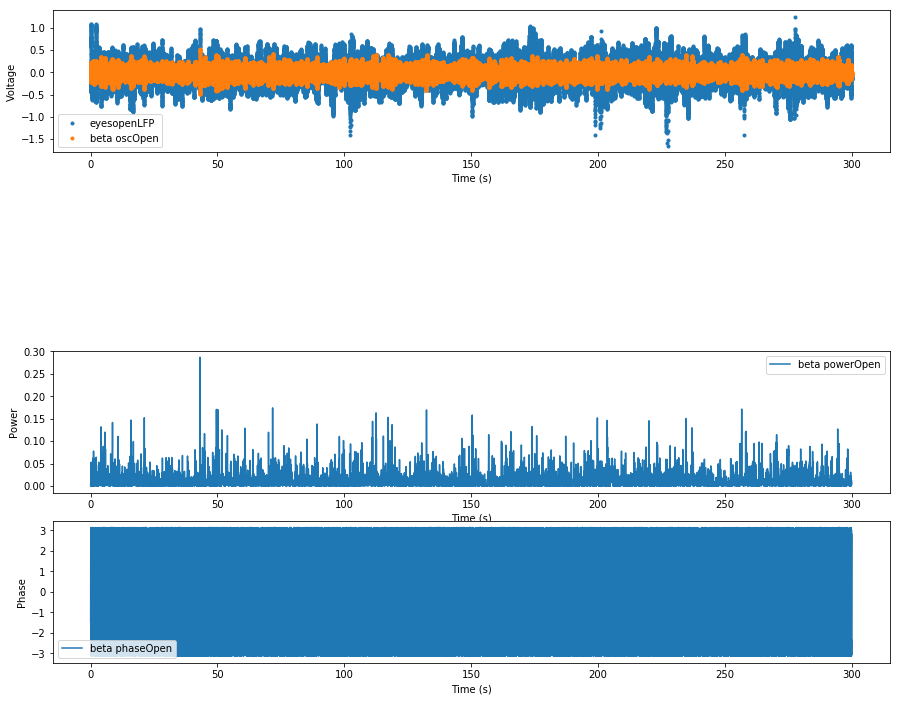

In [25]:
plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesopenLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, beta_oscOpen, '.', label ='beta oscOpen')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, beta_powerOpen, label = 'beta powerOpen')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, beta_phaseOpen, label = 'beta phaseOpen')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


In [26]:
# EYES CLOSED STAGE

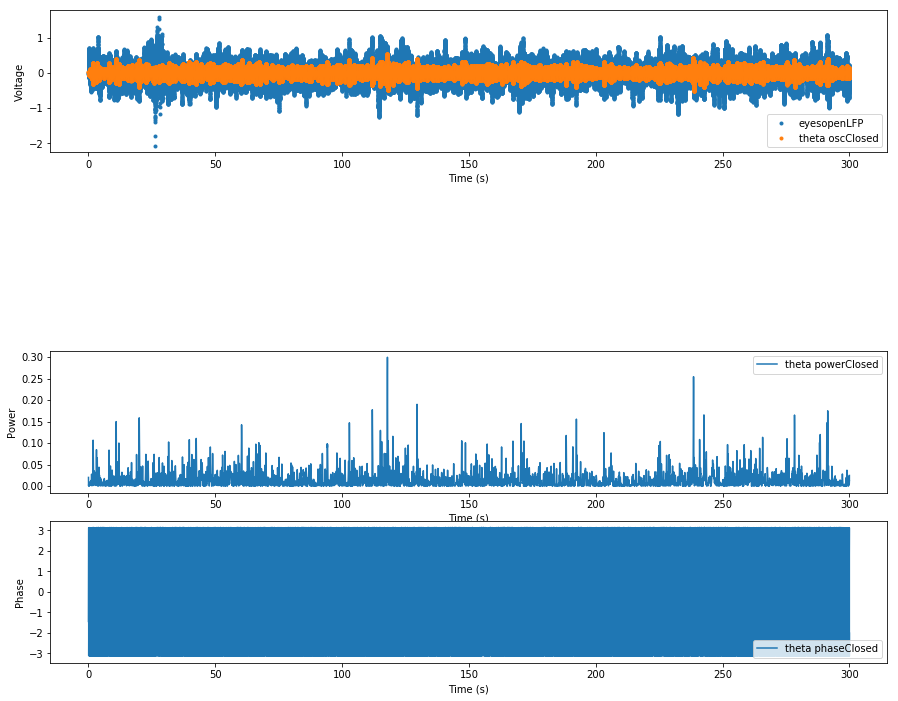

In [27]:
plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesclosedLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, theta_oscClosed, '.', label ='theta oscClosed')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, theta_powerClosed, label = 'theta powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, theta_phaseClosed, label = 'theta phaseClosed')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


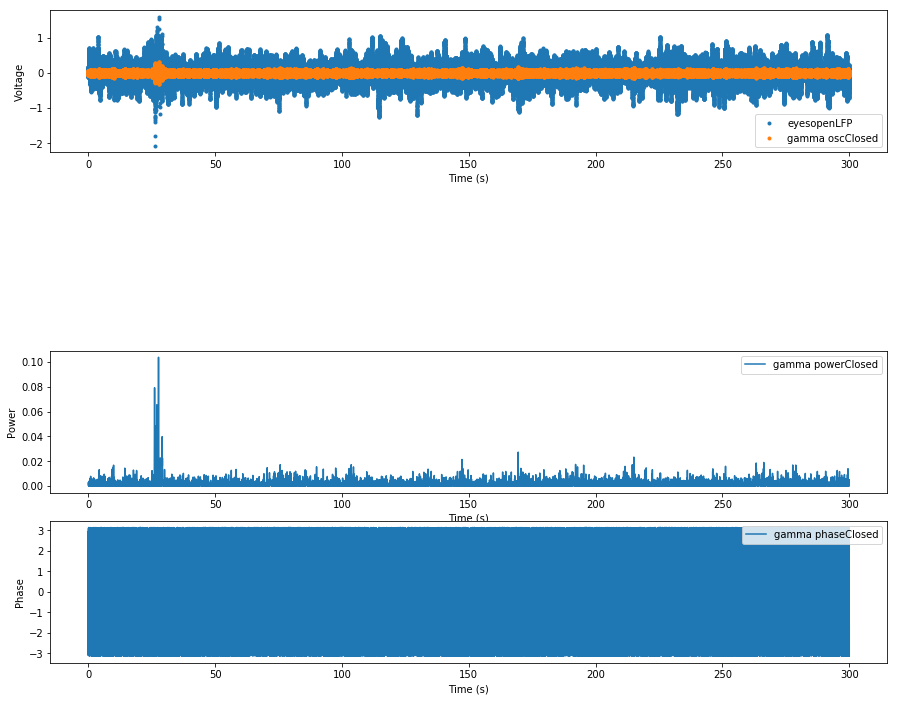

In [28]:
plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesclosedLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, gamma_oscClosed, '.', label ='gamma oscClosed')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, gamma_powerClosed, label = 'gamma powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, gamma_phaseClosed, label = 'gamma phaseClosed')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


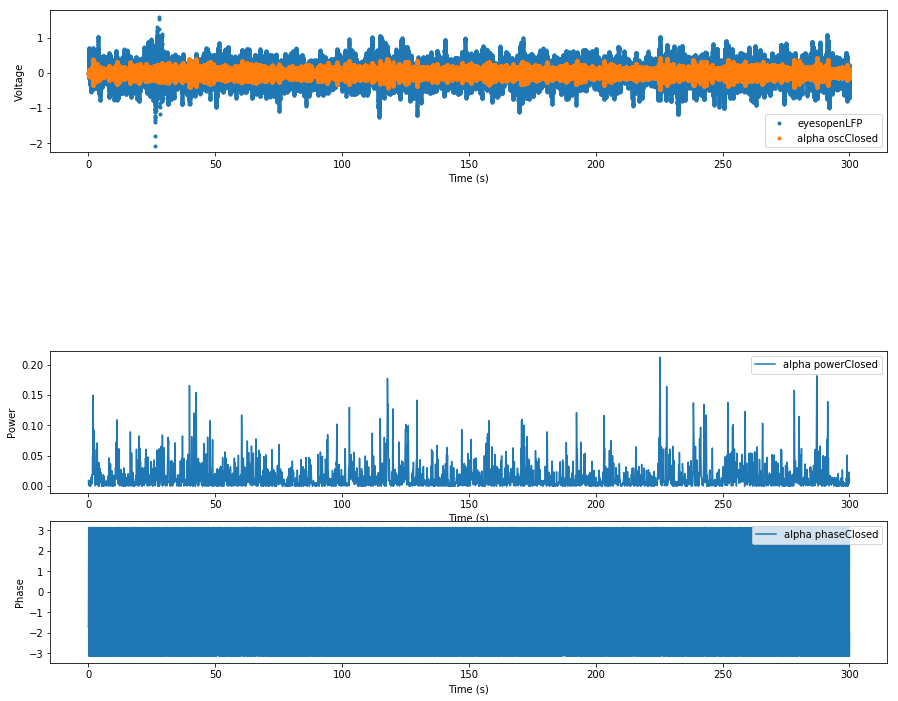

In [29]:
plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesclosedLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, alpha_oscClosed, '.', label ='alpha oscClosed')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, alpha_powerClosed, label = 'alpha powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, alpha_phaseClosed, label = 'alpha phaseClosed')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


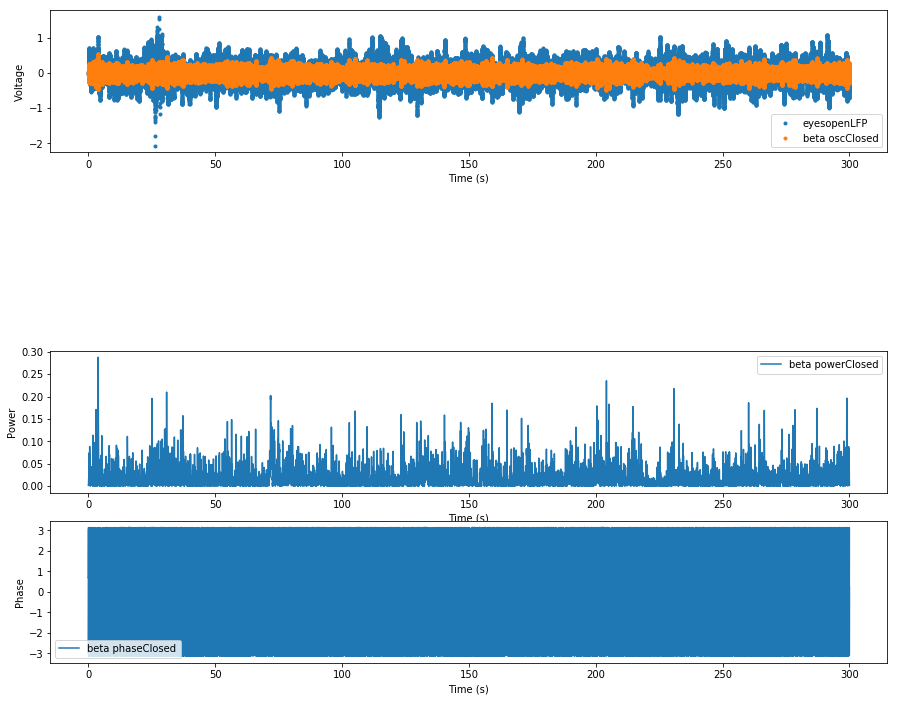

In [30]:
plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, eyesclosedLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, beta_oscClosed, '.', label ='beta oscClosed')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, beta_powerClosed, label = 'beta powerClosed')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, beta_phaseClosed, label = 'beta phaseClosed')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


In [31]:
# POWER OVER TIME WHILE MONKEY ASLEEP

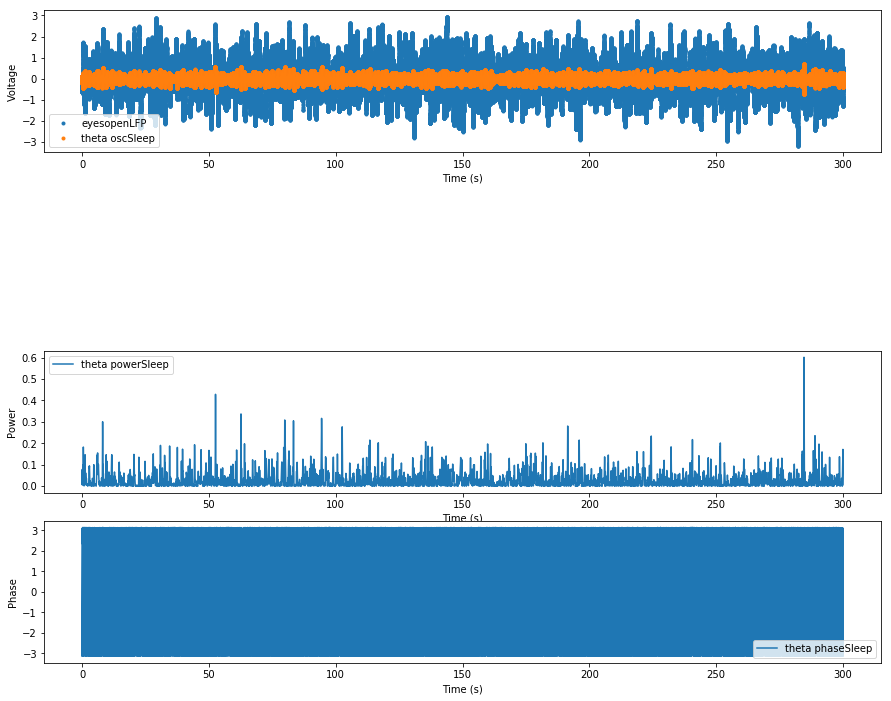

In [32]:
plt.figure(figsize=(15,12))

# plot the signal and the filtered signal
plt.subplot(4,1,1)
plt.plot(t_Open, sleepingMonkeyLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, theta_oscSleep, '.', label ='theta oscSleep')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, theta_powerSleep, label = 'theta powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, theta_phaseSleep, label = 'theta phaseSleep')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


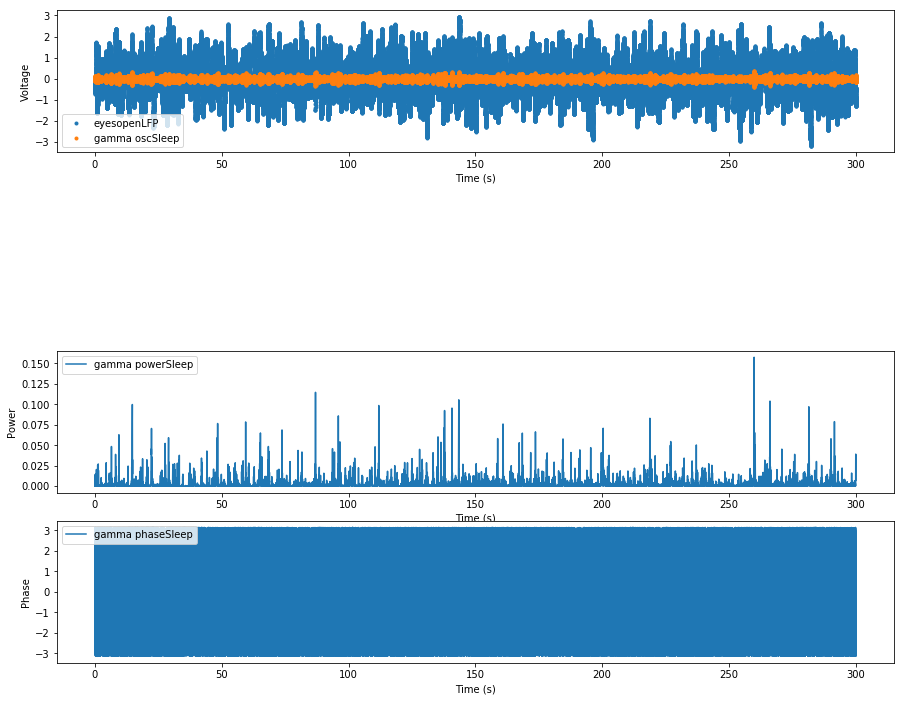

In [37]:
# plot the signal and the filtered signal
plt.figure(figsize=(15,12))
plt.subplot(4,1,1)
plt.plot(t_Open, sleepingMonkeyLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, gamma_oscSleep, '.', label ='gamma oscSleep')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, gamma_powerSleep, label = 'gamma powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, gamma_phaseSleep, label = 'gamma phaseSleep')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


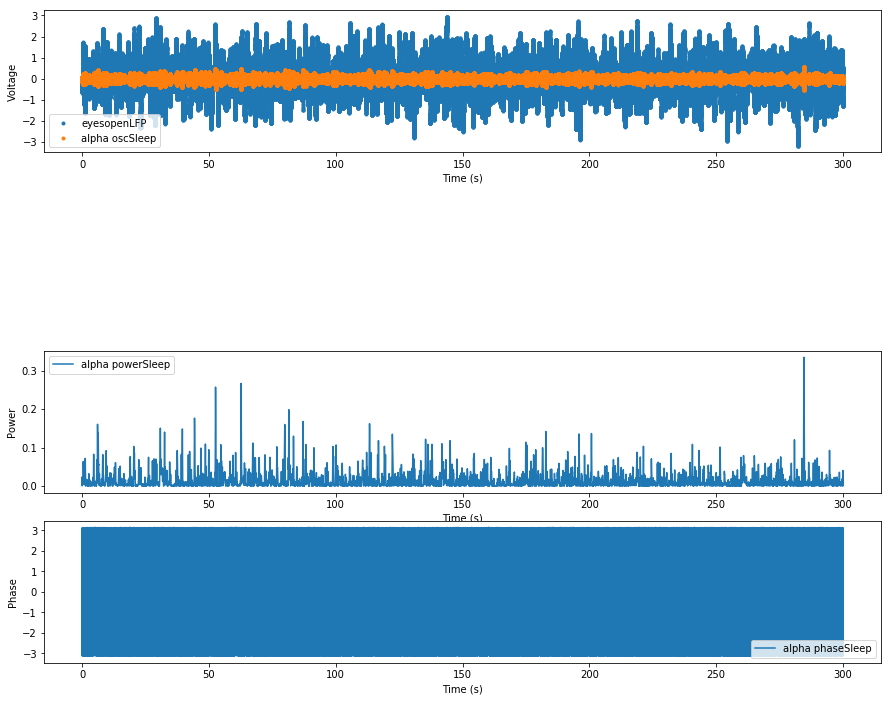

In [38]:
# plot the signal and the filtered signal
plt.figure(figsize=(15,12))
plt.subplot(4,1,1)
plt.plot(t_Open, sleepingMonkeyLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, alpha_oscSleep, '.', label ='alpha oscSleep')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, alpha_powerSleep, label = 'alpha powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, alpha_phaseSleep, label = 'alpha phaseSleep')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


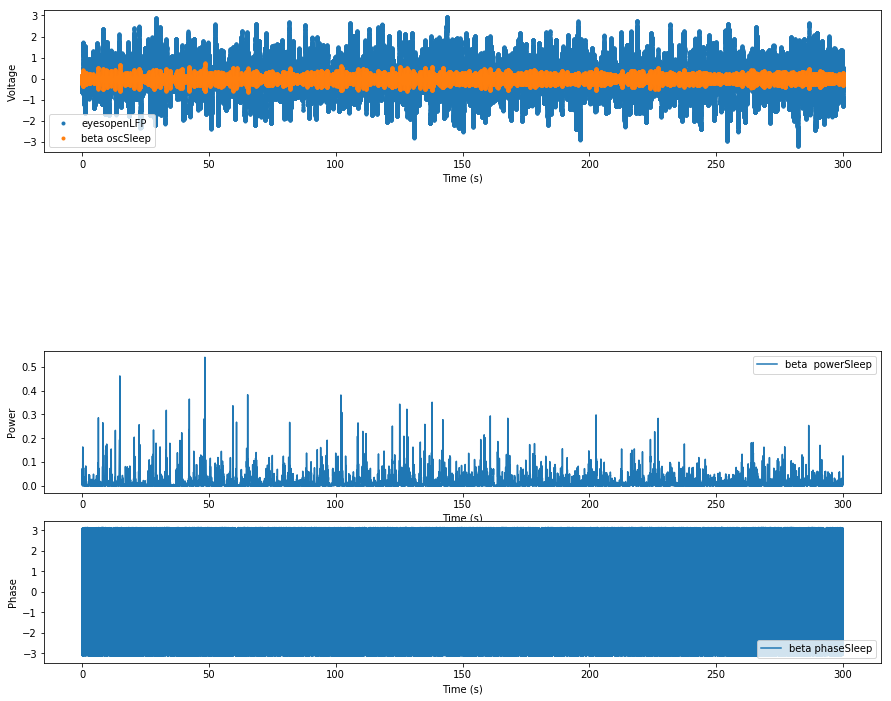

In [40]:
# plot the signal and the filtered signal
plt.figure(figsize=(15,12))
plt.subplot(4,1,1)
plt.plot(t_Open, sleepingMonkeyLFP, '.', label = 'eyesopenLFP')
plt.plot(t_Open, beta_oscSleep, '.', label ='beta oscSleep')
plt.xlabel('Time (s)'); plt.ylabel('Voltage')
plt.legend()
# plot the instantaneous power 
plt.subplot(4,1,3)
plt.plot(t_Open, beta_powerSleep, label = 'beta  powerSleep')
plt.xlabel('Time (s)'); plt.ylabel('Power')
plt.legend()

# plot the instantaneous phase
plt.subplot(4,1,4)
plt.plot(t_Open, beta_phaseSleep, label = 'beta phaseSleep')
plt.xlabel('Time (s)'); plt.ylabel('Phase')
plt.legend()


In [41]:
# PHASE AMPLITUDE COUPLING  BEGINS

In [42]:
#peaks and troughs for each wave in the open state

In [43]:
thetapeak_indsOpen = np.where(np.logical_and(theta_phaseOpen>-np.pi/2, theta_phaseOpen<np.pi/2))[0]
thetatrough_indsOpen = np.where(np.logical_or(theta_phaseOpen<-np.pi/2, theta_phaseOpen>np.pi/2))[0]

gammapeak_indsOpen = np.where(np.logical_and(gamma_phaseOpen>-np.pi/2, gamma_phaseOpen<np.pi/2))[0]
gammatrough_indsOpen = np.where(np.logical_or(gamma_phaseOpen<-np.pi/2, gamma_phaseOpen>np.pi/2))[0]

alphapeak_indsOpen = np.where(np.logical_and(alpha_phaseOpen>-np.pi/2, alpha_phaseOpen<np.pi/2))[0]
alphatrough_indsOpen = np.where(np.logical_or(alpha_phaseOpen<-np.pi/2, alpha_phaseOpen>np.pi/2))[0]

betapeak_indsOpen = np.where(np.logical_and(beta_phaseOpen>-np.pi/2, beta_phaseOpen<np.pi/2))[0]
betatrough_indsOpen = np.where(np.logical_or(beta_phaseOpen<-np.pi/2, beta_phaseOpen>np.pi/2))[0]

deltapeak_indsOpen = np.where(np.logical_and(delta_phaseOpen>-np.pi/2, delta_phaseOpen<np.pi/2))[0]
deltatrough_indsOpen = np.where(np.logical_or(delta_phaseOpen<-np.pi/2, delta_phaseOpen>np.pi/2))[0]

In [44]:
#peaks and troughs for each wave in the closed state
thetapeak_indsClosed = np.where(np.logical_and(theta_phaseClosed>-np.pi/2, theta_phaseClosed<np.pi/2))[0]
thetatrough_indsClosed = np.where(np.logical_or(theta_phaseClosed<-np.pi/2, theta_phaseClosed>np.pi/2))[0]

gammapeak_indsClosed = np.where(np.logical_and(gamma_phaseClosed>-np.pi/2, gamma_phaseClosed<np.pi/2))[0]
gammatrough_indsClosed = np.where(np.logical_or(gamma_phaseClosed<-np.pi/2, gamma_phaseClosed>np.pi/2))[0]

alphapeak_indsClosed = np.where(np.logical_and(alpha_phaseClosed>-np.pi/2, alpha_phaseClosed<np.pi/2))[0]
alphatrough_indsClosed = np.where(np.logical_or(alpha_phaseClosed<-np.pi/2, alpha_phaseClosed>np.pi/2))[0]

betapeak_indsClosed = np.where(np.logical_and(beta_phaseClosed>-np.pi/2, beta_phaseClosed<np.pi/2))[0]
betatrough_indsClosed = np.where(np.logical_or(beta_phaseClosed<-np.pi/2, beta_phaseClosed>np.pi/2))[0]

deltapeak_indsClosed = np.where(np.logical_and(delta_phaseClosed>-np.pi/2, delta_phaseClosed<np.pi/2))[0]
deltatrough_indsClosed = np.where(np.logical_or(delta_phaseClosed<-np.pi/2, delta_phaseClosed>np.pi/2))[0]

In [45]:
#peaks and troughs for each wave in the sleep state
thetapeak_indsSleep = np.where(np.logical_and(theta_phaseSleep>-np.pi/2, theta_phaseSleep<np.pi/2))[0]
thetatrough_indsSleep = np.where(np.logical_or(theta_phaseSleep<-np.pi/2, theta_phaseSleep>np.pi/2))[0]

gammapeak_indsSleep = np.where(np.logical_and(gamma_phaseSleep>-np.pi/2, gamma_phaseSleep<np.pi/2))[0]
gammatrough_indsSleep = np.where(np.logical_or(gamma_phaseSleep<-np.pi/2, gamma_phaseSleep>np.pi/2))[0]

alphapeak_indsSleep = np.where(np.logical_and(alpha_phaseSleep>-np.pi/2, alpha_phaseSleep<np.pi/2))[0]
alphatrough_indsSleep = np.where(np.logical_or(alpha_phaseSleep<-np.pi/2, alpha_phaseSleep>np.pi/2))[0]

betapeak_indsSleep = np.where(np.logical_and(beta_phaseSleep>-np.pi/2, beta_phaseSleep<np.pi/2))[0]
betatrough_indsSleep = np.where(np.logical_or(beta_phaseSleep<-np.pi/2, beta_phaseSleep>np.pi/2))[0]

deltapeak_indsSleep = np.where(np.logical_and(delta_phaseSleep>-np.pi/2, delta_phaseSleep<np.pi/2))[0]
deltatrough_indsSleep = np.where(np.logical_or(delta_phaseSleep<-np.pi/2, delta_phaseSleep>np.pi/2))[0]

# PHASE AMP Coupling EYES OPEN

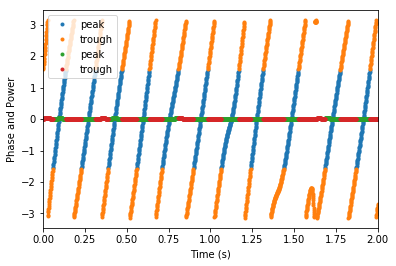

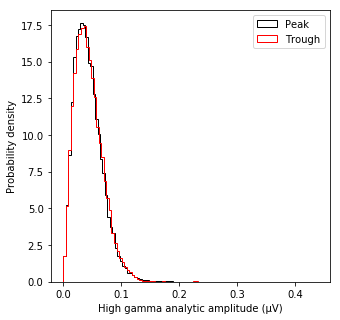

In [55]:
# plot the theta peak and trough phases
plt.plot(t_Open[thetapeak_indsOpen], theta_phaseOpen[thetapeak_indsOpen], '.', label = 'peak')
plt.plot(t_Open[thetatrough_indsOpen], theta_phaseOpen[thetatrough_indsOpen], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the gamma power corresponding to theta peak and trough phases
plt.plot(t_Open[thetapeak_indsOpen], gamma_powerOpen[thetapeak_indsOpen]*4, '.', label = 'peak')
plt.plot(t_Open[thetatrough_indsOpen], gamma_powerOpen[thetatrough_indsOpen]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerOpen[thetapeak_indsOpen]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerOpen[thetatrough_indsOpen]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

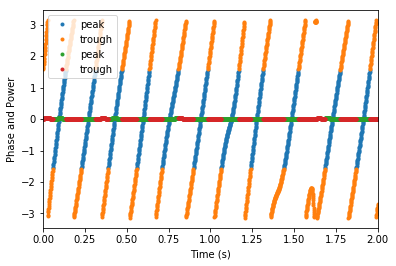

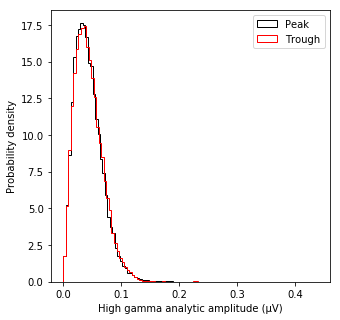

In [56]:
# plot the theta peak and trough phases
plt.plot(t_Open[thetapeak_indsOpen], theta_phaseOpen[thetapeak_indsOpen], '.', label = 'peak')
plt.plot(t_Open[thetatrough_indsOpen], theta_phaseOpen[thetatrough_indsOpen], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the gamma power corresponding to theta peak and trough phases
plt.plot(t_Open[thetapeak_indsOpen], gamma_powerOpen[thetapeak_indsOpen]*4, '.', label = 'peak')
plt.plot(t_Open[thetatrough_indsOpen], gamma_powerOpen[thetatrough_indsOpen]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerOpen[thetapeak_indsOpen]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerOpen[thetatrough_indsOpen]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

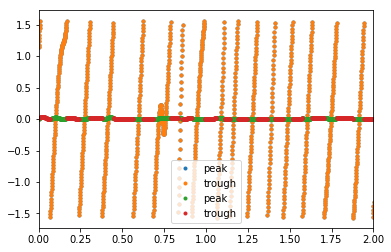

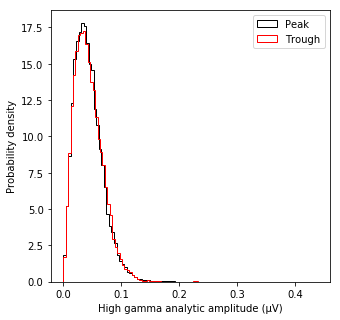

In [90]:
# plot the alpha peak and trough phases
plt.plot(t_Open[alphapeak_indsOpen], alpha_phaseOpen[alphapeak_indsOpen], '.', label = 'peak')
plt.plot(t_Open[alphapeak_indsOpen], alpha_phaseOpen[alphapeak_indsOpen], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the gamma power corresponding to alpha peak and trough phases
plt.plot(t_Open[alphapeak_indsOpen], gamma_powerOpen[alphapeak_indsOpen]*4, '.', label = 'peak')
plt.plot(t_Open[alphatrough_indsOpen], gamma_powerOpen[alphatrough_indsOpen]*4, '.', label = 'trough')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerOpen[alphapeak_indsOpen]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerOpen[alphatrough_indsOpen]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

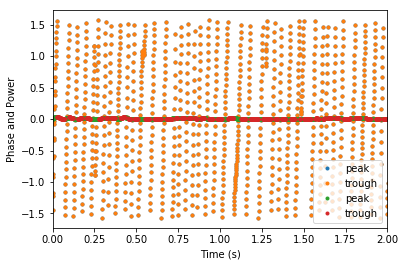

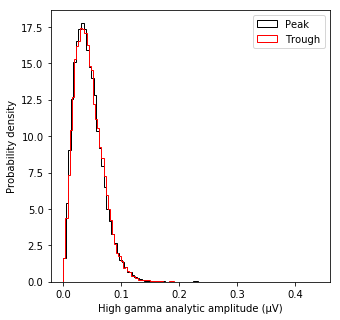

In [91]:
# plot the beta peak and trough phases
plt.plot(t_Open[betapeak_indsOpen], beta_phaseOpen[betapeak_indsOpen], '.', label = 'peak')
plt.plot(t_Open[betapeak_indsOpen], beta_phaseOpen[betapeak_indsOpen], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the gamma power corresponding to beta peak and trough phases
plt.plot(t_Open[betapeak_indsOpen], gamma_powerOpen[betapeak_indsOpen]*4, '.', label = 'peak')
plt.plot(t_Open[betatrough_indsOpen], gamma_powerOpen[betatrough_indsOpen]*4, '.', label = 'trough')
plt.legend()
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerOpen[betapeak_indsOpen]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerOpen[betatrough_indsOpen]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

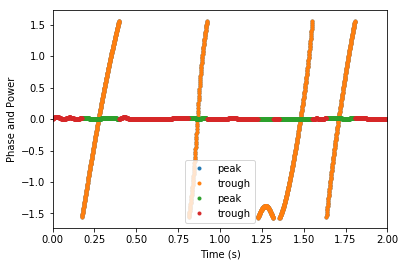

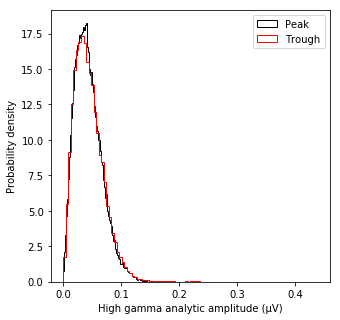

In [92]:
# plot the delta peak and trough phases
plt.plot(t_Open[deltapeak_indsOpen], delta_phaseOpen[deltapeak_indsOpen], '.', label = 'peak')
plt.plot(t_Open[deltapeak_indsOpen], delta_phaseOpen[deltapeak_indsOpen], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the gamma power corresponding to delta peak and trough phases
plt.plot(t_Open[deltapeak_indsOpen], gamma_powerOpen[deltapeak_indsOpen]*4, '.', label = 'peak')
plt.plot(t_Open[deltatrough_indsOpen], gamma_powerOpen[deltatrough_indsOpen]*4, '.', label = 'trough')
plt.legend()
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerOpen[deltapeak_indsOpen]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerOpen[deltatrough_indsOpen]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

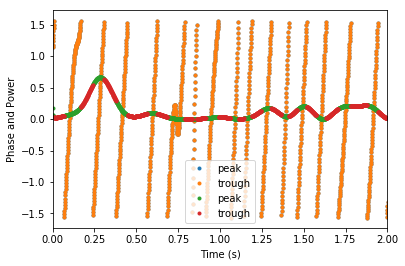

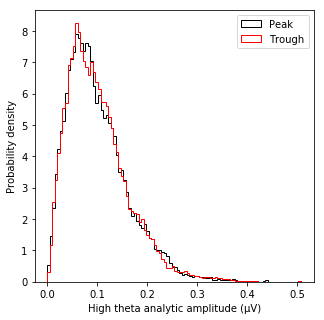

In [93]:
# plot the alpha peak and trough phases
plt.plot(t_Open[alphapeak_indsOpen], alpha_phaseOpen[alphapeak_indsOpen], '.', label = 'peak')
plt.plot(t_Open[alphapeak_indsOpen], alpha_phaseOpen[alphapeak_indsOpen], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the theta power corresponding to alpha peak and trough phases
plt.plot(t_Open[alphapeak_indsOpen], theta_powerOpen[alphapeak_indsOpen]*4, '.', label = 'peak')
plt.plot(t_Open[alphatrough_indsOpen], theta_powerOpen[alphatrough_indsOpen]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(theta_powerOpen[alphapeak_indsOpen]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(theta_powerOpen[alphatrough_indsOpen]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High theta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

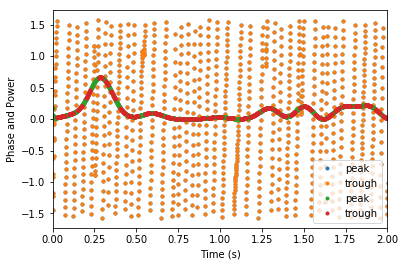

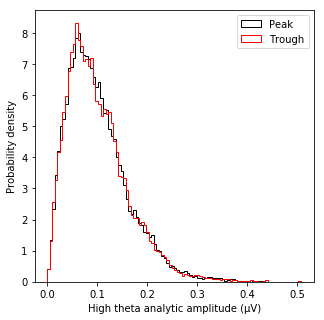

In [94]:
# plot the beta peak and trough phases
plt.plot(t_Open[betapeak_indsOpen], beta_phaseOpen[betapeak_indsOpen], '.', label = 'peak')
plt.plot(t_Open[betapeak_indsOpen], beta_phaseOpen[betapeak_indsOpen], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the theta power corresponding to beta peak and trough phases
plt.plot(t_Open[betapeak_indsOpen], theta_powerOpen[betapeak_indsOpen]*4, '.', label = 'peak')
plt.plot(t_Open[betatrough_indsOpen], theta_powerOpen[betatrough_indsOpen]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(theta_powerOpen[betapeak_indsOpen]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(theta_powerOpen[betatrough_indsOpen]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High theta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

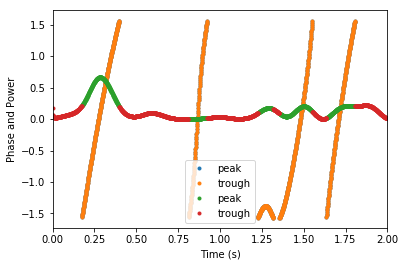

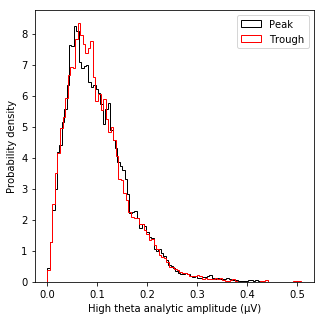

In [95]:
# plot the delta peak and trough phases
plt.plot(t_Open[deltapeak_indsOpen], delta_phaseOpen[deltapeak_indsOpen], '.', label = 'peak')
plt.plot(t_Open[deltapeak_indsOpen], delta_phaseOpen[deltapeak_indsOpen], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the theta power corresponding to delta peak and trough phases
plt.plot(t_Open[deltapeak_indsOpen], theta_powerOpen[deltapeak_indsOpen]*4, '.', label = 'peak')
plt.plot(t_Open[deltatrough_indsOpen], theta_powerOpen[deltatrough_indsOpen]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(theta_powerOpen[deltapeak_indsOpen]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(theta_powerOpen[deltatrough_indsOpen]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High theta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

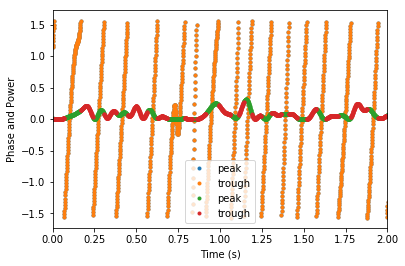

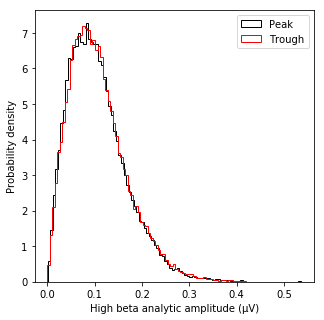

In [96]:
# plot the alpha peak and trough phases
plt.plot(t_Open[alphapeak_indsOpen], alpha_phaseOpen[alphapeak_indsOpen], '.', label = 'peak')
plt.plot(t_Open[alphapeak_indsOpen], alpha_phaseOpen[alphapeak_indsOpen], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the beta power corresponding to alpha peak and trough phases
plt.plot(t_Open[alphapeak_indsOpen], beta_powerOpen[alphapeak_indsOpen]*4, '.', label = 'peak')
plt.plot(t_Open[alphatrough_indsOpen], beta_powerOpen[alphatrough_indsOpen]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(beta_powerOpen[alphapeak_indsOpen]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(beta_powerOpen[alphatrough_indsOpen]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High beta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

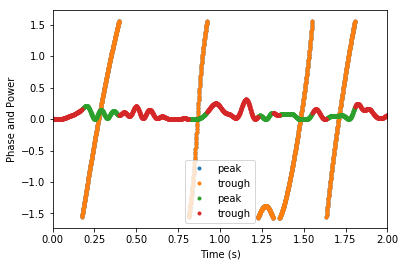

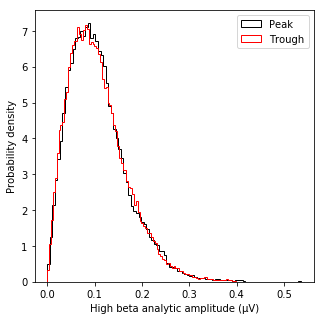

In [97]:
# plot the delta peak and trough phases
plt.plot(t_Open[deltapeak_indsOpen], delta_phaseOpen[deltapeak_indsOpen], '.', label = 'peak')
plt.plot(t_Open[deltapeak_indsOpen], delta_phaseOpen[deltapeak_indsOpen], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the beta power corresponding to delta peak and trough phases
plt.plot(t_Open[deltapeak_indsOpen], beta_powerOpen[deltapeak_indsOpen]*4, '.', label = 'peak')
plt.plot(t_Open[deltatrough_indsOpen], beta_powerOpen[deltatrough_indsOpen]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(beta_powerOpen[deltapeak_indsOpen]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(beta_powerOpen[deltatrough_indsOpen]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High beta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

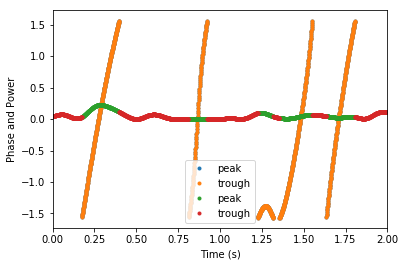

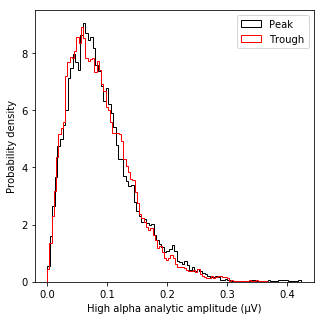

In [98]:
# plot the delta peak and trough phases
plt.plot(t_Open[deltapeak_indsOpen], delta_phaseOpen[deltapeak_indsOpen], '.', label = 'peak')
plt.plot(t_Open[deltapeak_indsOpen], delta_phaseOpen[deltapeak_indsOpen], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the alpha power corresponding to delta peak and trough phases
plt.plot(t_Open[deltapeak_indsOpen], alpha_powerOpen[deltapeak_indsOpen]*4, '.', label = 'peak')
plt.plot(t_Open[deltatrough_indsOpen], alpha_powerOpen[deltatrough_indsOpen]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(alpha_powerOpen[deltapeak_indsOpen]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(alpha_powerOpen[deltatrough_indsOpen]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High alpha analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

# PHASE AMP Coupling EYES CLOSED

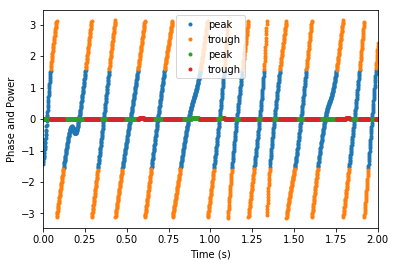

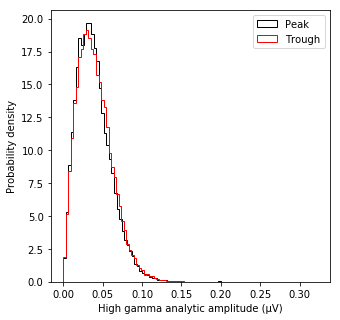

In [99]:
# plot the theta peak and trough phases
plt.plot(t_Open[thetapeak_indsClosed], theta_phaseClosed[thetapeak_indsClosed], '.', label = 'peak')
plt.plot(t_Open[thetatrough_indsClosed], theta_phaseClosed[thetatrough_indsClosed], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the gamma power corresponding to theta peak and trough phases
plt.plot(t_Open[thetapeak_indsClosed], gamma_powerClosed[thetapeak_indsClosed]*4, '.', label = 'peak')
plt.plot(t_Open[thetatrough_indsClosed], gamma_powerClosed[thetatrough_indsClosed]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerClosed[thetapeak_indsClosed]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerClosed[thetatrough_indsClosed]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

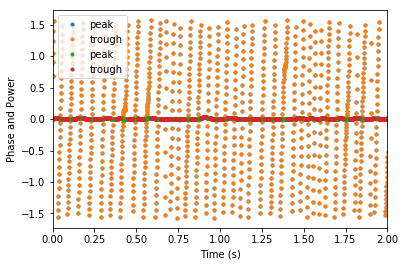

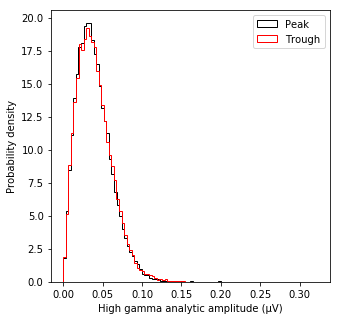

In [100]:
# plot the beta peak and trough phases
plt.plot(t_Open[betapeak_indsClosed], beta_phaseClosed[betapeak_indsClosed], '.', label = 'peak')
plt.plot(t_Open[betapeak_indsClosed], beta_phaseClosed[betapeak_indsClosed], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the gamma power corresponding to beta peak and trough phases
plt.plot(t_Closed[betapeak_indsClosed], gamma_powerClosed[betapeak_indsClosed]*4, '.', label = 'peak')
plt.plot(t_Closed[betatrough_indsClosed], gamma_powerClosed[betatrough_indsClosed]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerClosed[betapeak_indsClosed]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerClosed[betatrough_indsClosed]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

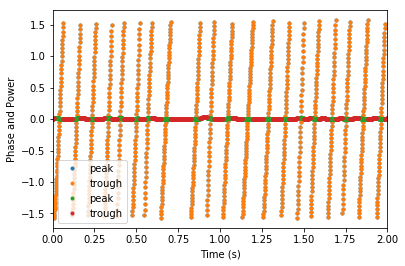

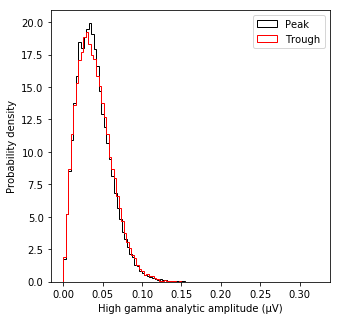

In [101]:
# plot the alpha peak and trough phases
plt.plot(t_Open[alphapeak_indsClosed], alpha_phaseClosed[alphapeak_indsClosed], '.', label = 'peak')
plt.plot(t_Open[alphapeak_indsClosed], alpha_phaseClosed[alphapeak_indsClosed], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the gamma power corresponding to alpha peak and trough phases
plt.plot(t_Closed[alphapeak_indsClosed], gamma_powerClosed[alphapeak_indsClosed]*4, '.', label = 'peak')
plt.plot(t_Closed[alphatrough_indsClosed], gamma_powerClosed[alphatrough_indsClosed]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerClosed[alphapeak_indsClosed]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerClosed[alphatrough_indsClosed]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

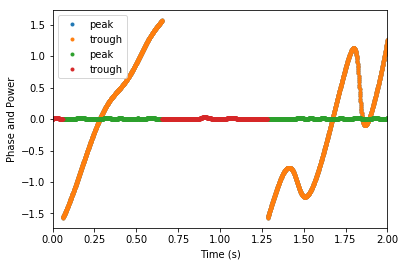

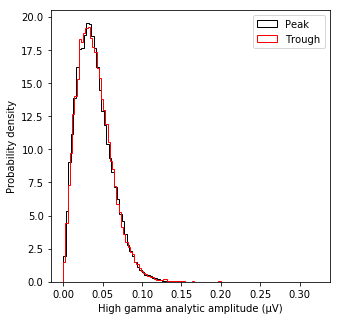

In [102]:
# plot the delta peak and trough phases
plt.plot(t_Open[deltapeak_indsClosed], delta_phaseClosed[deltapeak_indsClosed], '.', label = 'peak')
plt.plot(t_Open[deltapeak_indsClosed], delta_phaseClosed[deltapeak_indsClosed], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the gamma power corresponding to delta peak and trough phases
plt.plot(t_Closed[deltapeak_indsClosed], gamma_powerClosed[deltapeak_indsClosed]*4, '.', label = 'peak')
plt.plot(t_Closed[deltatrough_indsClosed], gamma_powerClosed[deltatrough_indsClosed]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerClosed[deltapeak_indsClosed]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerClosed[deltatrough_indsClosed]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

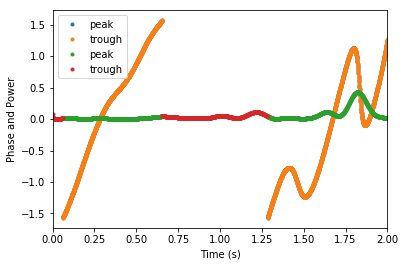

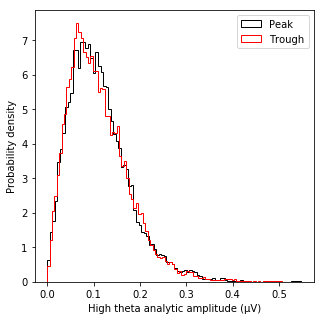

In [103]:
# plot the delta peak and trough phases
plt.plot(t_Open[deltapeak_indsClosed], delta_phaseClosed[deltapeak_indsClosed], '.', label = 'peak')
plt.plot(t_Open[deltapeak_indsClosed], delta_phaseClosed[deltapeak_indsClosed], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the theta power corresponding to delta peak and trough phases
plt.plot(t_Closed[deltapeak_indsClosed], theta_powerClosed[deltapeak_indsClosed]*4, '.', label = 'peak')
plt.plot(t_Closed[deltatrough_indsClosed], theta_powerClosed[deltatrough_indsClosed]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(theta_powerClosed[deltapeak_indsClosed]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(theta_powerClosed[deltatrough_indsClosed]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High theta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

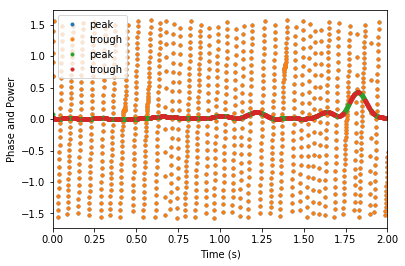

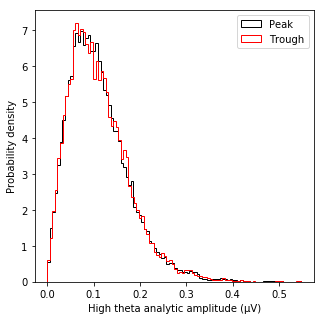

In [104]:
# plot the beta peak and trough phases
plt.plot(t_Open[betapeak_indsClosed], beta_phaseClosed[betapeak_indsClosed], '.', label = 'peak')
plt.plot(t_Open[betapeak_indsClosed], beta_phaseClosed[betapeak_indsClosed], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the theta power corresponding to beta peak and trough phases
plt.plot(t_Closed[betapeak_indsClosed], theta_powerClosed[betapeak_indsClosed]*4, '.', label = 'peak')
plt.plot(t_Closed[betatrough_indsClosed], theta_powerClosed[betatrough_indsClosed]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(theta_powerClosed[betapeak_indsClosed]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(theta_powerClosed[betatrough_indsClosed]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High theta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

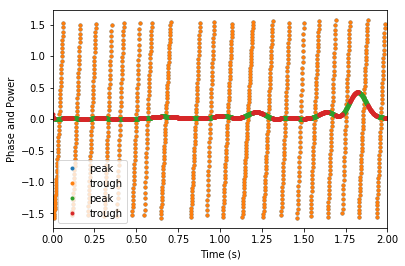

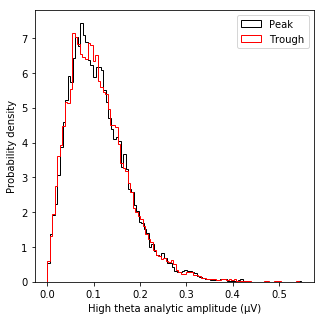

In [105]:
# plot the alpha peak and trough phases
plt.plot(t_Open[alphapeak_indsClosed], alpha_phaseClosed[alphapeak_indsClosed], '.', label = 'peak')
plt.plot(t_Open[alphapeak_indsClosed], alpha_phaseClosed[alphapeak_indsClosed], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the theta power corresponding to alpha peak and trough phases
plt.plot(t_Closed[alphapeak_indsClosed], theta_powerClosed[alphapeak_indsClosed]*4, '.', label = 'peak')
plt.plot(t_Closed[alphatrough_indsClosed], theta_powerClosed[alphatrough_indsClosed]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(theta_powerClosed[alphapeak_indsClosed]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(theta_powerClosed[alphatrough_indsClosed]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High theta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

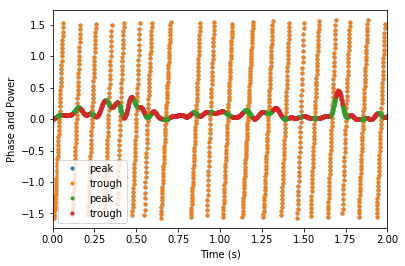

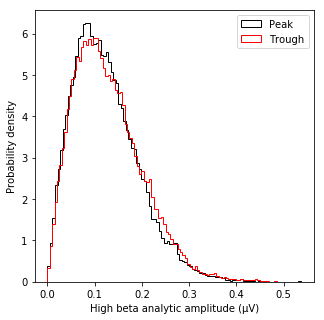

In [106]:
# plot the alpha peak and trough phases
plt.plot(t_Open[alphapeak_indsClosed], alpha_phaseClosed[alphapeak_indsClosed], '.', label = 'peak')
plt.plot(t_Open[alphapeak_indsClosed], alpha_phaseClosed[alphapeak_indsClosed], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the beta power corresponding to alpha peak and trough phases
plt.plot(t_Closed[alphapeak_indsClosed], beta_powerClosed[alphapeak_indsClosed]*4, '.', label = 'peak')
plt.plot(t_Closed[alphatrough_indsClosed], beta_powerClosed[alphatrough_indsClosed]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(beta_powerClosed[alphapeak_indsClosed]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(beta_powerClosed[alphatrough_indsClosed]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High beta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

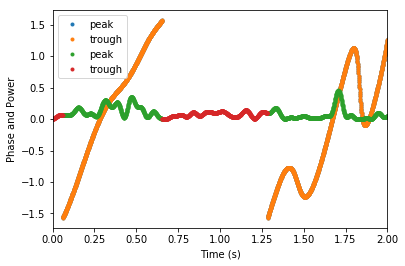

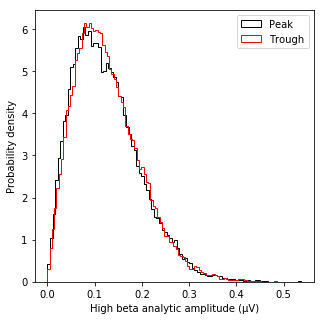

In [107]:
# plot the delta peak and trough phases
plt.plot(t_Open[deltapeak_indsClosed], delta_phaseClosed[deltapeak_indsClosed], '.', label = 'peak')
plt.plot(t_Open[deltapeak_indsClosed], delta_phaseClosed[deltapeak_indsClosed], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the beta power corresponding to delta peak and trough phases
plt.plot(t_Closed[deltapeak_indsClosed], beta_powerClosed[deltapeak_indsClosed]*4, '.', label = 'peak')
plt.plot(t_Closed[deltatrough_indsClosed], beta_powerClosed[deltatrough_indsClosed]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(beta_powerClosed[deltapeak_indsClosed]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(beta_powerClosed[deltatrough_indsClosed]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High beta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

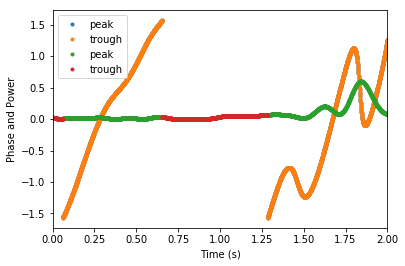

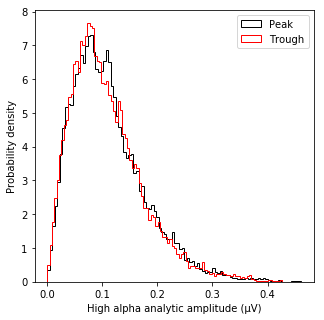

In [108]:
# plot the delta peak and trough phases
plt.plot(t_Open[deltapeak_indsClosed], delta_phaseClosed[deltapeak_indsClosed], '.', label = 'peak')
plt.plot(t_Open[deltapeak_indsClosed], delta_phaseClosed[deltapeak_indsClosed], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the alpha power corresponding to delta peak and trough phases
plt.plot(t_Closed[deltapeak_indsClosed], alpha_powerClosed[deltapeak_indsClosed]*4, '.', label = 'peak')
plt.plot(t_Closed[deltatrough_indsClosed], alpha_powerClosed[deltatrough_indsClosed]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(alpha_powerClosed[deltapeak_indsClosed]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(alpha_powerClosed[deltatrough_indsClosed]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High alpha analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

# PHASE AMP COUPLING MONKEY ASLEEP


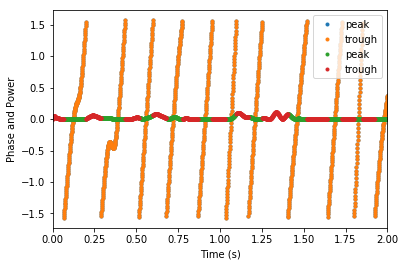

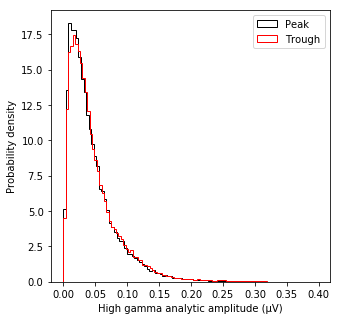

In [109]:
# plot the theta peak and trough phases
plt.plot(t_Open[thetapeak_indsSleep], theta_phaseSleep[thetapeak_indsSleep], '.', label = 'peak')
plt.plot(t_Open[thetapeak_indsSleep], theta_phaseSleep[thetapeak_indsSleep], '.', label = 'trough')
plt.xlim([0, 2]);


# plot the gamma power corresponding to theta peak and trough phases
plt.plot(t_Sleep[thetapeak_indsSleep], gamma_powerSleep[thetapeak_indsSleep]*4, '.', label = 'peak')
plt.plot(t_Sleep[thetatrough_indsSleep], gamma_powerSleep[thetatrough_indsSleep]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerSleep[thetapeak_indsSleep]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerSleep[thetatrough_indsSleep]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

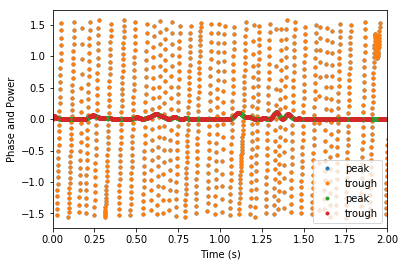

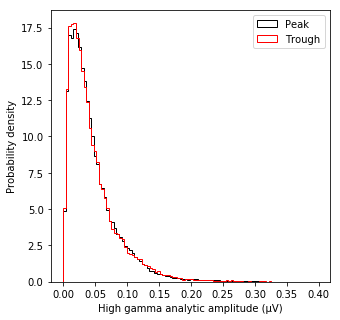

In [110]:
# plot the beta peak and trough phases
plt.plot(t_Open[betapeak_indsSleep], beta_phaseSleep[betapeak_indsSleep], '.', label = 'peak')
plt.plot(t_Open[betapeak_indsSleep], beta_phaseSleep[betapeak_indsSleep], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the gamma power corresponding to beta peak and trough phases
plt.plot(t_Sleep[betapeak_indsSleep], gamma_powerSleep[betapeak_indsSleep]*4, '.', label = 'peak')
plt.plot(t_Sleep[betatrough_indsSleep], gamma_powerSleep[betatrough_indsSleep]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerSleep[betapeak_indsSleep]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerSleep[betatrough_indsSleep]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

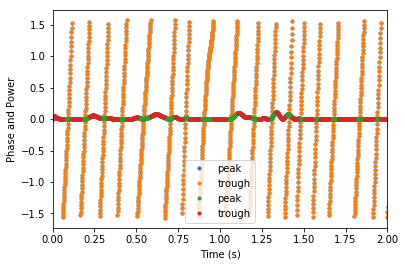

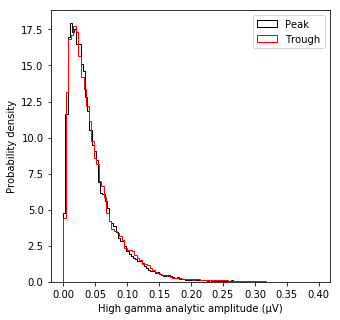

In [111]:
# plot the alpha peak and trough phases
plt.plot(t_Open[alphapeak_indsSleep], alpha_phaseSleep[alphapeak_indsSleep], '.', label = 'peak')
plt.plot(t_Open[alphapeak_indsSleep], alpha_phaseSleep[alphapeak_indsSleep], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the gamma power corresponding to alpha peak and trough phases
plt.plot(t_Sleep[alphapeak_indsSleep], gamma_powerSleep[alphapeak_indsSleep]*4, '.', label = 'peak')
plt.plot(t_Sleep[alphatrough_indsSleep], gamma_powerSleep[alphatrough_indsSleep]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerSleep[alphapeak_indsSleep]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerSleep[alphatrough_indsSleep]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

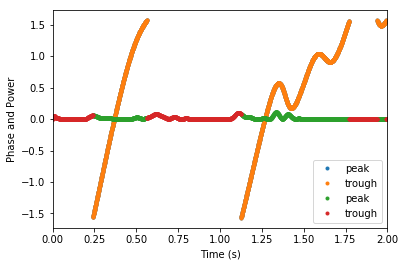

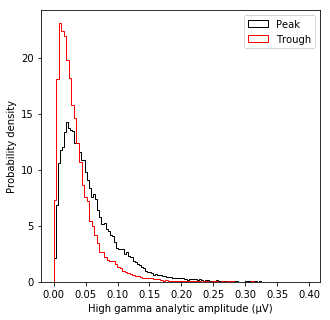

In [112]:
# plot the delta peak and trough phases
plt.plot(t_Open[deltapeak_indsSleep], delta_phaseSleep[deltapeak_indsSleep], '.', label = 'peak')
plt.plot(t_Open[deltapeak_indsSleep], delta_phaseSleep[deltapeak_indsSleep], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the gamma power corresponding to delta peak and trough phases
plt.plot(t_Sleep[deltapeak_indsSleep], gamma_powerSleep[deltapeak_indsSleep]*4, '.', label = 'peak')
plt.plot(t_Sleep[deltatrough_indsSleep], gamma_powerSleep[deltatrough_indsSleep]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(gamma_powerSleep[deltapeak_indsSleep]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(gamma_powerSleep[deltatrough_indsSleep]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High gamma analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

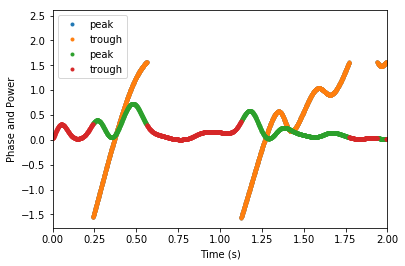

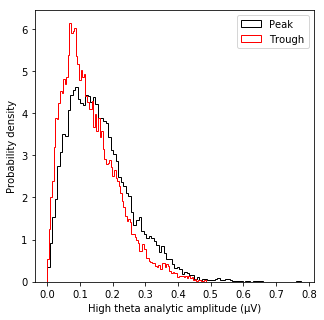

In [113]:
# plot the delta peak and trough phases
plt.plot(t_Open[deltapeak_indsSleep], delta_phaseSleep[deltapeak_indsSleep], '.', label = 'peak')
plt.plot(t_Open[deltapeak_indsSleep], delta_phaseSleep[deltapeak_indsSleep], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the theta power corresponding to delta peak and trough phases
plt.plot(t_Sleep[deltapeak_indsSleep], theta_powerSleep[deltapeak_indsSleep]*4, '.', label = 'peak')
plt.plot(t_Sleep[deltatrough_indsSleep], theta_powerSleep[deltatrough_indsSleep]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(theta_powerSleep[deltapeak_indsSleep]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(theta_powerSleep[deltatrough_indsSleep]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High theta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

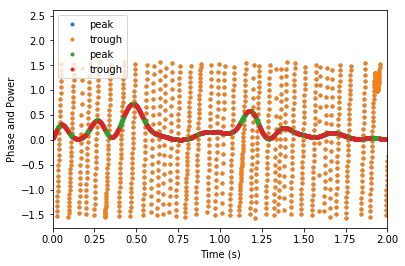

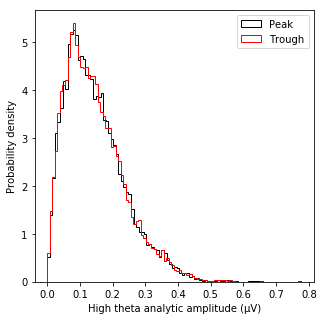

In [114]:
# plot the beta peak and trough phases
plt.plot(t_Open[betapeak_indsSleep], beta_phaseSleep[betapeak_indsSleep], '.', label = 'peak')
plt.plot(t_Open[betapeak_indsSleep], beta_phaseSleep[betapeak_indsSleep], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the theta power corresponding to beta peak and trough phases
plt.plot(t_Sleep[betapeak_indsSleep], theta_powerSleep[betapeak_indsSleep]*4, '.', label = 'peak')
plt.plot(t_Sleep[betatrough_indsSleep], theta_powerSleep[betatrough_indsSleep]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(theta_powerSleep[betapeak_indsSleep]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(theta_powerSleep[betatrough_indsSleep]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High theta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

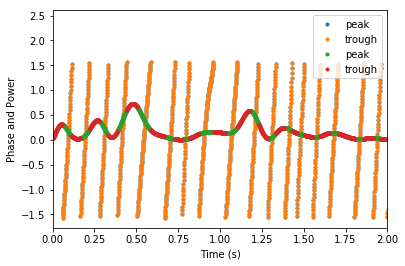

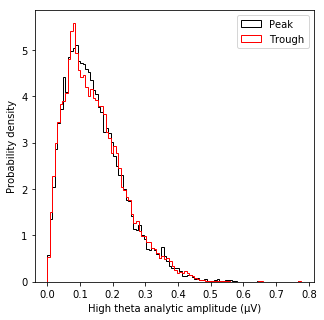

In [115]:
# plot the alpha peak and trough phases
plt.plot(t_Open[alphapeak_indsSleep], alpha_phaseSleep[alphapeak_indsSleep], '.', label = 'peak')
plt.plot(t_Open[alphapeak_indsSleep], alpha_phaseSleep[alphapeak_indsSleep], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the theta power corresponding to alpha peak and trough phases
plt.plot(t_Sleep[alphapeak_indsSleep], theta_powerSleep[alphapeak_indsSleep]*4, '.', label = 'peak')
plt.plot(t_Sleep[alphatrough_indsSleep], theta_powerSleep[alphatrough_indsSleep]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(theta_powerSleep[alphapeak_indsSleep]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(theta_powerSleep[alphatrough_indsSleep]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High theta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

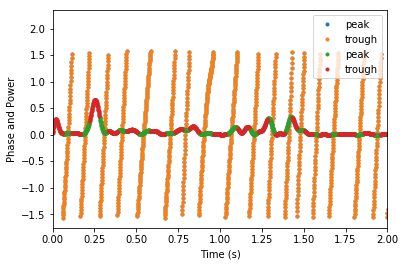

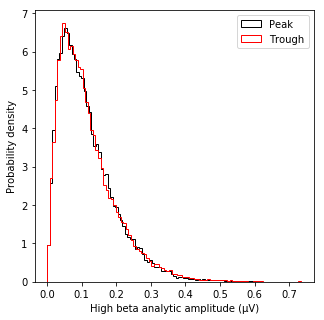

In [116]:
# plot the alpha peak and trough phases
plt.plot(t_Open[alphapeak_indsSleep], alpha_phaseSleep[alphapeak_indsSleep], '.', label = 'peak')
plt.plot(t_Open[alphapeak_indsSleep], alpha_phaseSleep[alphapeak_indsSleep], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the beta power corresponding to alpha peak and trough phases
plt.plot(t_Sleep[alphapeak_indsSleep], beta_powerSleep[alphapeak_indsSleep]*4, '.', label = 'peak')
plt.plot(t_Sleep[alphatrough_indsSleep], beta_powerSleep[alphatrough_indsSleep]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(beta_powerSleep[alphapeak_indsSleep]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(beta_powerSleep[alphatrough_indsSleep]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High beta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

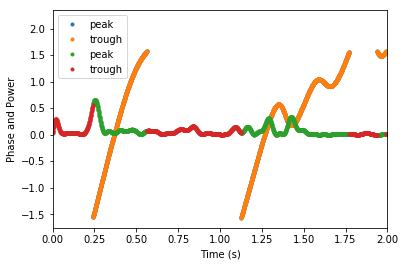

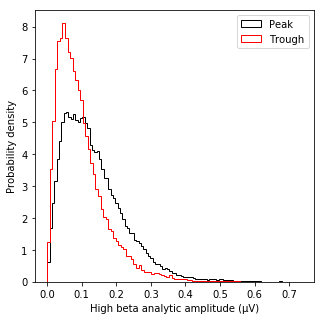

In [117]:
# plot the delta peak and trough phases
plt.plot(t_Open[deltapeak_indsSleep], delta_phaseSleep[deltapeak_indsSleep], '.', label = 'peak')
plt.plot(t_Open[deltapeak_indsSleep], delta_phaseSleep[deltapeak_indsSleep], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the beta power corresponding to delta peak and trough phases
plt.plot(t_Sleep[deltapeak_indsSleep], beta_powerSleep[deltapeak_indsSleep]*4, '.', label = 'peak')
plt.plot(t_Sleep[deltatrough_indsSleep], beta_powerSleep[deltatrough_indsSleep]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(beta_powerSleep[deltapeak_indsSleep]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(beta_powerSleep[deltatrough_indsSleep]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High beta analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

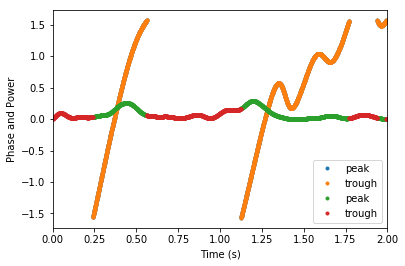

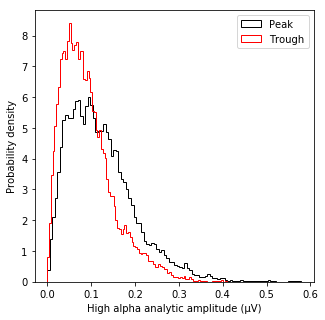

In [118]:
# plot the delta peak and trough phases
plt.plot(t_Open[deltapeak_indsSleep], delta_phaseSleep[deltapeak_indsSleep], '.', label = 'peak')
plt.plot(t_Open[deltapeak_indsSleep], delta_phaseSleep[deltapeak_indsSleep], '.', label = 'trough')
plt.xlim([0, 2]);

# plot the alpha power corresponding to delta peak and trough phases
plt.plot(t_Sleep[deltapeak_indsSleep], alpha_powerSleep[deltapeak_indsSleep]*4, '.', label = 'peak')
plt.plot(t_Sleep[deltatrough_indsSleep], alpha_powerSleep[deltatrough_indsSleep]*4, '.', label = 'trough')
plt.xlabel('Time (s)'); plt.ylabel('Phase and Power')
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist(np.sqrt(alpha_powerSleep[deltapeak_indsSleep]), 100, color='k',normed=True, histtype='step', label='Peak');
plt.hist(np.sqrt(alpha_powerSleep[deltatrough_indsSleep]), 100, color='r',normed=True, histtype='step', label='Trough');
plt.xlabel('High alpha analytic amplitude (µV)'); plt.ylabel('Probability density')
plt.legend()

In [27]:
#Eyes Open Correlations Power
theta_gamma_corr_open = np.corrcoef(theta_powerOpen, gamma_powerOpen)
theta_alpha_corr_open = np.corrcoef(theta_powerOpen, alpha_powerOpen)
theta_beta_corr_open = np.corrcoef(theta_powerOpen, beta_powerOpen)
theta_delta_corr_open = np.corrcoef(theta_powerOpen, delta_powerOpen)

gamma_alpha_corr_open = np.corrcoef(gamma_powerOpen, alpha_powerOpen)
gamma_beta_corr_open = np.corrcoef(gamma_powerOpen, beta_powerOpen)
gamma_delta_corr_open = np.corrcoef(gamma_powerOpen, delta_powerOpen)

alpha_beta_corr_open = np.corrcoef(alpha_powerOpen, beta_powerOpen)
alpha_delta_corr_open = np.corrcoef(alpha_powerOpen, delta_powerOpen)

beta_delta_corr_open = np.corrcoef(beta_powerOpen, delta_powerOpen)

print(theta_alpha_corr_open)
print(theta_beta_corr_open)
print(theta_delta_corr_open)
print(theta_gamma_corr_open)
print('-----------------------------')
print(gamma_alpha_corr_open)
print(gamma_beta_corr_open)
print(gamma_delta_corr_open)
print('-----------------------------')
print(alpha_beta_corr_open)
print(alpha_delta_corr_open)
print('-----------------------------')
print(beta_delta_corr_open)

[[1.         0.64767223]
 [0.64767223 1.        ]]
[[1.         0.06920565]
 [0.06920565 1.        ]]
[[1.        0.2176297]
 [0.2176297 1.       ]]
[[1.         0.04294222]
 [0.04294222 1.        ]]
-----------------------------
[[1.         0.01806097]
 [0.01806097 1.        ]]
[[1.         0.03339285]
 [0.03339285 1.        ]]
[[1.        0.0441883]
 [0.0441883 1.       ]]
-----------------------------
[[1.         0.10558087]
 [0.10558087 1.        ]]
[[1.         0.13354158]
 [0.13354158 1.        ]]
-----------------------------
[[1.         0.01961541]
 [0.01961541 1.        ]]


In [28]:
#Eyes Closed Correlation
theta_gamma_corr_closed = np.corrcoef(theta_powerClosed, gamma_powerClosed)
theta_alpha_corr_closed = np.corrcoef(theta_powerClosed, alpha_powerClosed)
theta_beta_corr_closed = np.corrcoef(theta_powerClosed, beta_powerClosed)
theta_delta_corr_closed = np.corrcoef(theta_powerClosed, delta_powerClosed)

gamma_alpha_corr_closed = np.corrcoef(gamma_powerClosed, alpha_powerClosed)
gamma_beta_corr_closed = np.corrcoef(gamma_powerClosed, beta_powerClosed)
gamma_delta_corr_closed = np.corrcoef(gamma_powerClosed, delta_powerClosed)

alpha_beta_corr_closed = np.corrcoef(alpha_powerClosed, beta_powerClosed)
alpha_delta_corr_closed = np.corrcoef(alpha_powerClosed, delta_powerClosed)

beta_delta_corr_closed = np.corrcoef(beta_powerClosed, delta_powerClosed)

print(theta_alpha_corr_closed)
print(theta_beta_corr_closed)
print(theta_delta_corr_closed)
print(theta_gamma_corr_closed)
print('-----------------------------')
print(gamma_alpha_corr_closed)
print(gamma_beta_corr_closed)
print(gamma_delta_corr_closed)
print('-----------------------------')
print(alpha_beta_corr_closed)
print(alpha_delta_corr_closed)
print('-----------------------------')
print(beta_delta_corr_closed)

[[1.         0.65792206]
 [0.65792206 1.        ]]
[[1.         0.02227276]
 [0.02227276 1.        ]]
[[1.        0.0859858]
 [0.0859858 1.       ]]
[[1.         0.01082372]
 [0.01082372 1.        ]]
-----------------------------
[[1.         0.00938292]
 [0.00938292 1.        ]]
[[1.         0.09331679]
 [0.09331679 1.        ]]
[[1.         0.01474695]
 [0.01474695 1.        ]]
-----------------------------
[[1.         0.03558047]
 [0.03558047 1.        ]]
[[1.         0.04020057]
 [0.04020057 1.        ]]
-----------------------------
[[1.         0.02361718]
 [0.02361718 1.        ]]


In [30]:
#Sleep Correlation
theta_gamma_corr_sleep = np.corrcoef(theta_powerSleep, gamma_powerSleep)
theta_alpha_corr_sleep = np.corrcoef(theta_powerSleep, alpha_powerSleep)
theta_beta_corr_sleep = np.corrcoef(theta_powerSleep, beta_powerSleep)
theta_delta_corr_sleep = np.corrcoef(theta_powerSleep, delta_powerSleep)

gamma_alpha_corr_sleep = np.corrcoef(gamma_powerSleep, alpha_powerSleep)
gamma_beta_corr_sleep = np.corrcoef(gamma_powerSleep, beta_powerSleep)
gamma_delta_corr_sleep = np.corrcoef(gamma_powerSleep, delta_powerSleep)

alpha_beta_corr_sleep = np.corrcoef(alpha_powerSleep, beta_powerSleep)
alpha_delta_corr_sleep = np.corrcoef(alpha_powerSleep, delta_powerSleep)

beta_delta_corr_sleep = np.corrcoef(beta_powerSleep, delta_powerSleep)

print(theta_alpha_corr_sleep)
print(theta_beta_corr_sleep)
print(theta_delta_corr_sleep)
print(theta_gamma_corr_sleep)
print('-----------------------------')
print(gamma_alpha_corr_sleep)
print(gamma_beta_corr_sleep)
print(gamma_delta_corr_sleep)
print('-----------------------------')
print(alpha_beta_corr_sleep)
print(alpha_delta_corr_sleep)
print('-----------------------------')
print(beta_delta_corr_sleep)

[[1.         0.65841763]
 [0.65841763 1.        ]]
[[1.         0.10671215]
 [0.10671215 1.        ]]
[[1.         0.11438565]
 [0.11438565 1.        ]]
[[1.         0.11718091]
 [0.11718091 1.        ]]
-----------------------------
[[1.         0.16973919]
 [0.16973919 1.        ]]
[[1.         0.34772417]
 [0.34772417 1.        ]]
[[1.         0.04917121]
 [0.04917121 1.        ]]
-----------------------------
[[1.         0.14678245]
 [0.14678245 1.        ]]
[[1.         0.09892623]
 [0.09892623 1.        ]]
-----------------------------
[[ 1.         -0.00783846]
 [-0.00783846  1.        ]]
